# Problem Statement

- Shuttle dataset consists of 9 continuous attributes and one class attribute.
- Description of class labels is given in dataset description.mht file. 
- Two datasets are given: training set and test set. 
- This dataset represents an interesting scenario where 80% of data belongs to class1.
- The last column is the class which has been coded as follows : 1 Rad Flow 2 Fpv Close 3 Fpv Open 4 High 5 Bypass 6 Bpv Close  7 Bpv Open.

### Your task is to apply various classification algorithm to improve it’s accuracy beyond 80%. 

# 1. Import Libraries

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# 2. Load Datasets

In [2]:
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

# 3. Data Exploration 

In [3]:
data_train.head()

,Id,0,1,2,3,4,5,6,7,8,Category
0,0,50,21,77,0,28,0,27,48,22,2
1,1,55,0,92,0,0,26,36,92,56,4
2,2,53,0,82,0,52,-5,29,30,2,1
3,3,37,0,76,0,28,18,40,48,8,1
4,4,37,0,79,0,34,-26,43,46,2,1


In [4]:
data_test.head()

,Id,0,1,2,3,4,5,6,7,8
0,0,55,0,81,0,-6,11,25,88,64
1,1,56,0,96,0,52,-4,40,44,4
2,2,50,-1,89,-7,50,0,39,40,2
3,3,53,9,79,0,42,-2,25,37,12
4,4,55,2,82,0,54,-6,26,28,2


In [5]:
data_train.shape

(43500, 11)

In [6]:
data_test.shape

(14500, 10)

In [7]:
data_train.isna().sum()

Id          0
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
Category    0
dtype: int64

In [8]:
data_test.isna().sum()

Id    0
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
dtype: int64

- Train dataset has 43500 datapoints with 10 features and 1 target label in column 'Category'
- Test dataset has 14500 datapoints with same 10 features as training set. And as expected it doesn't have 'Category' column
- No Column has missing values

In [9]:
# Rename the variables

data_train.rename(columns={'0':'A1','1':'A2','2':'A3','3':'A4','4':'A5','5':'A6','6':'A7','7':'A8','8':'A9'},inplace=True)
data_test.rename(columns={'0':'A1','1':'A2','2':'A3','3':'A4','4':'A5','5':'A6','6':'A7','7':'A8','8':'A9'},inplace=True)

In [10]:
data_train.dtypes

Id          int64
A1          int64
A2          int64
A3          int64
A4          int64
A5          int64
A6          int64
A7          int64
A8          int64
A9          int64
Category    int64
dtype: object

In [11]:
data_train.describe()

,Id,A1,A2,A3,A4,A5,A6,A7,A8,A9,Category
count,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000
mean,21749.500000,48.249747,-0.205126,85.341563,0.262736,34.528782,1.298276,37.074552,50.899862,13.964598,1.700529
std,12557.512692,12.252618,78.142770,8.908602,41.004131,21.703409,179.486760,13.135557,21.463250,25.648404,1.354648
min,0.000000,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-13839.000000,-48.000000,-353.000000,-356.000000,1.000000
25%,10874.750000,38.000000,0.000000,79.000000,0.000000,26.000000,-5.000000,31.000000,37.000000,0.000000,1.000000
50%,21749.500000,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,32624.250000,55.000000,0.000000,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000,1.000000
max,43499.000000,126.000000,5075.000000,149.000000,3830.000000,436.000000,13148.000000,105.000000,270.000000,266.000000,7.000000


# 4. Explore Target Variable

In [12]:
data_train["Category"].unique()

array([2, 4, 1, 5, 3, 7, 6], dtype=int64)

- All the 10 features are Continuous Variables
- 'Category' is the only Categorical variable with 7 Categories

In [13]:
p=data_train.groupby(["Category"]).A1.count().to_frame().rename(columns={'A1':'count_Category'}).reset_index()
p["Category %age"]=p["count_Category"]*100/len(data_train)
p

,Category,count_Category,Category %age
0,1,34108,78.409195
1,2,37,0.085057
2,3,132,0.303448
3,4,6748,15.512644
4,5,2458,5.650575
5,6,6,0.013793
6,7,11,0.025287


- Category 1 Constitutes for 78.4% of the data in the training set
- Category 4 15.5% of the train data. Rest all constitutes for other 6% of data.

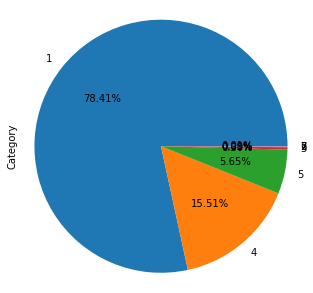

In [14]:
# Pie Plot to Visualise the Target Variable
plt.figure(figsize=(5,5))
data_train["Category"].value_counts().plot.pie(autopct='%1.2f%%')
plt.axis('equal')
plt.show()

- The Training set contains 78.4% data of Class 1 (Rad Flow). The Class 1 (Rad Flow) can be taken as the Normal Class. Besides the Normal Rad Flow Class, about 21.6% of the original data describe abnormal situations. Class 2, 3, 4, 5, 6, 7 can all be classified as an Anomaly.

# Approach 1 - Treat as a Binary Class Problem

In [15]:
# Assign as 1 in Category as 0 and 2,3,4,5,6,7 as 1

data_train.loc[data_train["Category"]==1,"Category"]=0
data_train.loc[data_train["Category"]>1,"Category"]=1

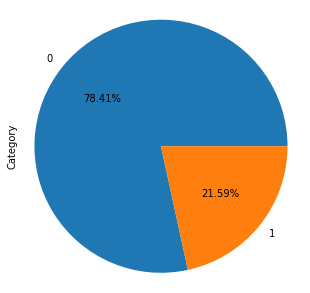

In [16]:
# Pie Plot to Visualise the Target Variable
plt.figure(figsize=(5,5))
data_train["Category"].value_counts().plot.pie(autopct='%1.2f%%')
plt.axis('equal')
plt.show()

- The problem will now be treated as a binary classification problem with 0 as Normal Class and 1 as Anomaly.

In [17]:
# Dropping Id from both Train and Test
data_train=data_train.drop("Id",axis=1)
data_test=data_test.drop("Id",axis=1)

# 5. Exploratory Data Analysis

### 5.1. Visualize the relations in the dataset

C:\Users\abhay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


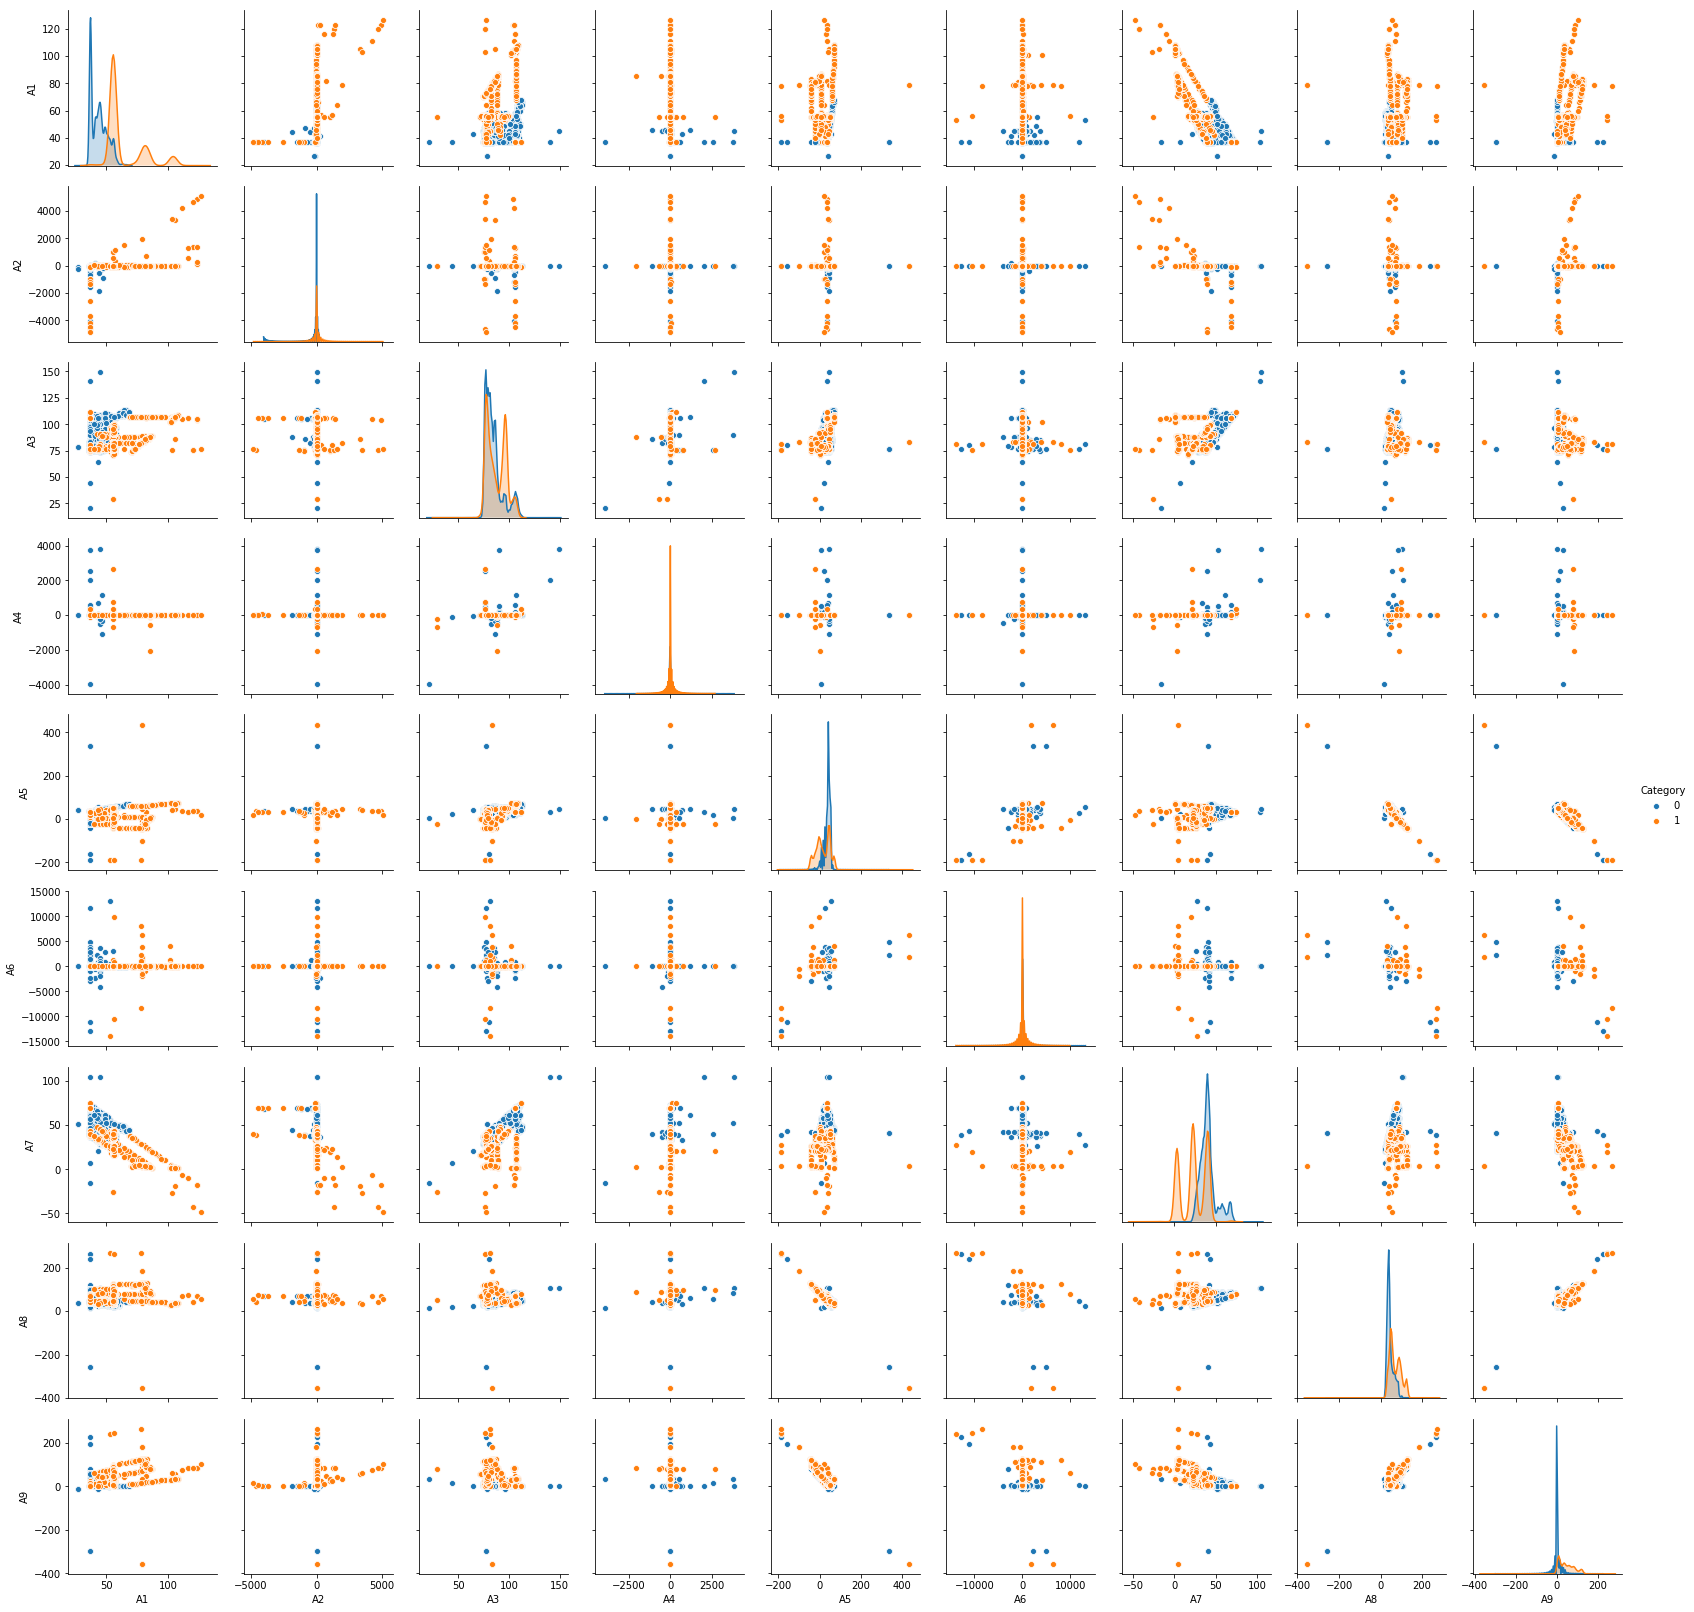

In [187]:
sns.pairplot(data_train,vars=["A1","A2","A3","A4","A5","A6","A7","A8","A9"],hue="Category")
plt.show()

### 5.2 Univariate Analysis

C:\Users\abhay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


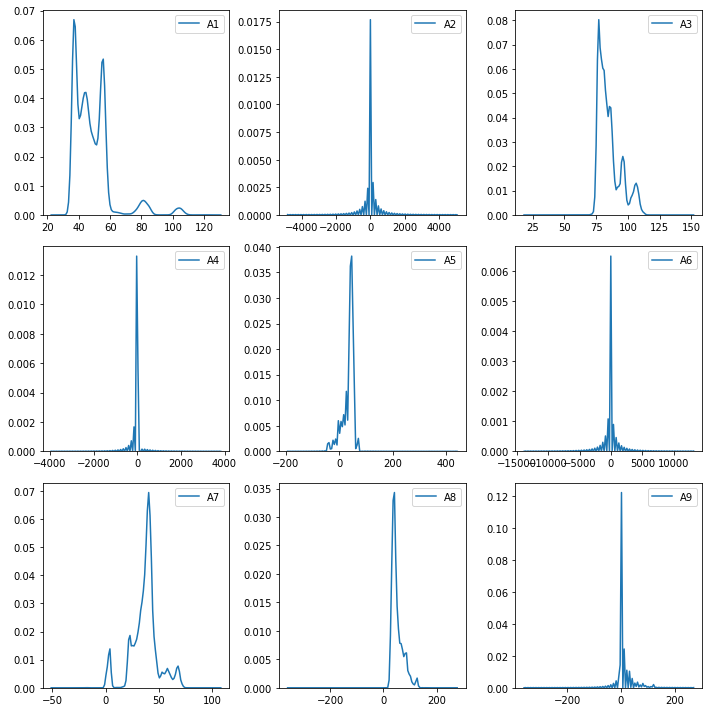

In [188]:
# Visualize the distribution of each independent continuous variable
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.kdeplot(data_train["A1"])
plt.subplot(3,3,2)
sns.kdeplot(data_train["A2"])
plt.subplot(3,3,3)
sns.kdeplot(data_train["A3"])
plt.subplot(3,3,4)
sns.kdeplot(data_train["A4"])
plt.subplot(3,3,5)
sns.kdeplot(data_train["A5"])
plt.subplot(3,3,6)
sns.kdeplot(data_train["A6"])
plt.subplot(3,3,7)
sns.kdeplot(data_train["A7"])
plt.subplot(3,3,8)
sns.kdeplot(data_train["A8"])
plt.subplot(3,3,9)
sns.kdeplot(data_train["A9"])
plt.tight_layout()

### 5.3 Bivariate Analysis

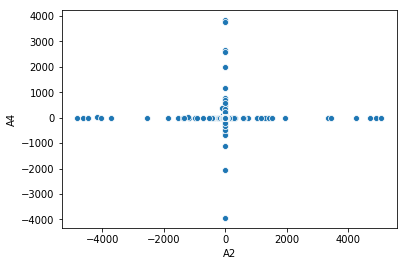

In [189]:
sns.scatterplot(x="A2",y="A4",data=data_train)

##### Visualize the relation between the Continuous variable

In [190]:
data1=data_train.drop("Category",axis=1)

In [191]:
corr = data1.corr()
corr

,A1,A2,A3,A4,A5,A6,A7,A8,A9
A1,1.000000,0.066365,0.262622,-0.007774,-0.051460,0.007306,-0.757307,0.168417,0.526896
A2,0.066365,1.000000,-0.013422,-0.001609,0.000373,-0.001826,-0.070628,-0.005827,0.031235
A3,0.262622,-0.013422,1.000000,0.042157,0.255181,-0.002909,0.430019,0.155282,-0.091279
A4,-0.007774,-0.001609,0.042157,1.000000,-0.004767,0.008286,0.036169,0.022352,0.000410
A5,-0.051460,0.000373,0.255181,-0.004767,1.000000,0.103159,0.221277,-0.914963,-0.875212
A6,0.007306,-0.001826,-0.002909,0.008286,0.103159,1.000000,-0.008569,-0.105569,-0.083378
A7,-0.757307,-0.070628,0.430019,0.036169,0.221277,-0.008569,1.000000,-0.053010,-0.555205
A8,0.168417,-0.005827,0.155282,0.022352,-0.914963,-0.105569,-0.053010,1.000000,0.859527
A9,0.526896,0.031235,-0.091279,0.000410,-0.875212,-0.083378,-0.555205,0.859527,1.000000


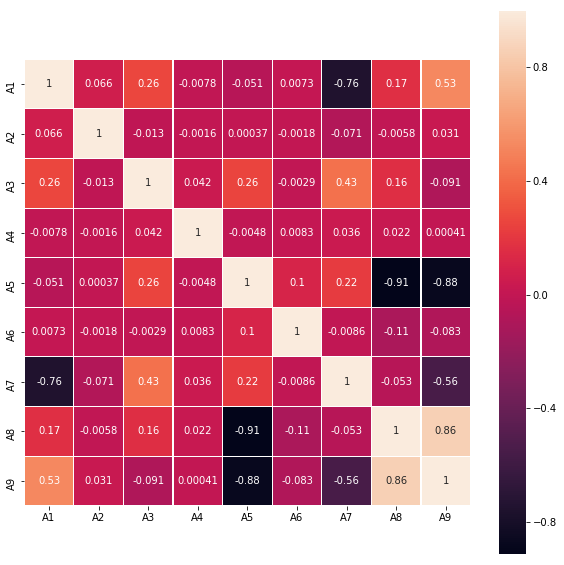

In [192]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,linewidths=0.2,vmax=1.0, 
            square=True,linecolor='white', annot=True)

##### Strong correlation between – 
- A1 and A7 (negative)
- A1 and A9 (positive)
- A5 and A8 (negative)
- A5 and A8 (negative)
- A7 and A9 (negative)
- A8 and A9 (positive)
- A7 and A3 (positive)

##### Visualize the relation between Target Variable and Independent Variable

C:\Users\abhay\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


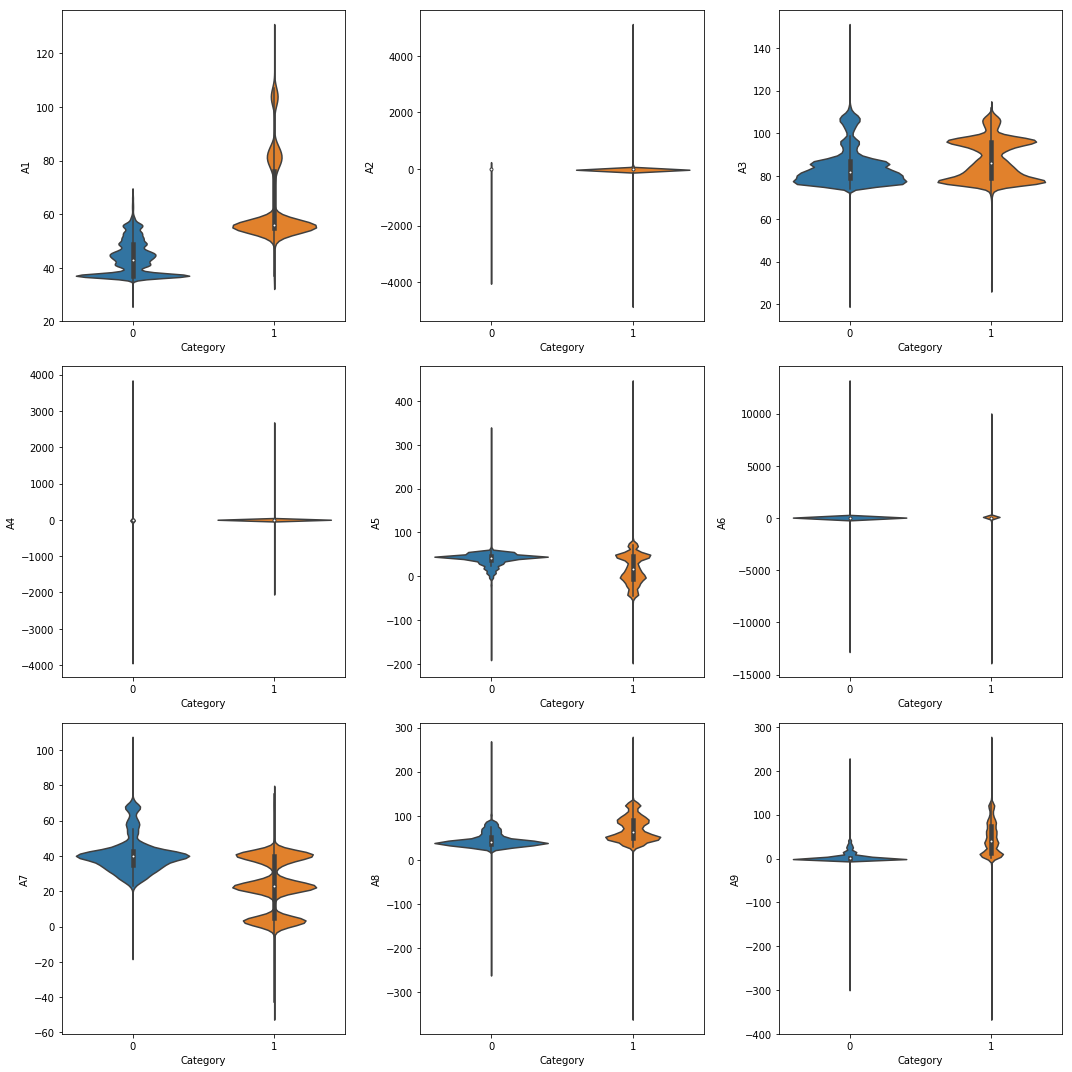

In [193]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.violinplot(data_train["Category"],data_train["A1"])
plt.subplot(3,3,2)
sns.violinplot(data_train["Category"],data_train["A2"])
plt.subplot(3,3,3)
sns.violinplot(data_train["Category"],data_train["A3"])
plt.subplot(3,3,4)
sns.violinplot(data_train["Category"],data_train["A4"])
plt.subplot(3,3,5)
sns.violinplot(data_train["Category"],data_train["A5"])
plt.subplot(3,3,6)
sns.violinplot(data_train["Category"],data_train["A6"])
plt.subplot(3,3,7)
sns.violinplot(data_train["Category"],data_train["A7"])
plt.subplot(3,3,8)
sns.violinplot(data_train["Category"],data_train["A8"])
plt.subplot(3,3,9)
sns.violinplot(data_train["Category"],data_train["A9"])
plt.tight_layout()

### 5.4 Statistical Tests

In [194]:
t,p =stats.ttest_ind(data_train[data_train["Category"]==0].A1,
               data_train[data_train["Category"]==1].A1)
print ('t-test between Category and A1')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A1 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train[data_train["Category"]==0].A2,
               data_train[data_train["Category"]==1].A2)
print ('t-test between Category and A2')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A2 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train[data_train["Category"]==0].A3,
               data_train[data_train["Category"]==1].A3)
print ('t-test between Category and A3')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A3 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train[data_train["Category"]==0].A4,
               data_train[data_train["Category"]==1].A4)
print ('t-test between Category and A4')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A4 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train[data_train["Category"]==0].A5,
               data_train[data_train["Category"]==1].A5)
print ('t-test between Category and A5')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A5 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train[data_train["Category"]==0].A6,
               data_train[data_train["Category"]==1].A6)
print ('t-test between Category and A6')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A6 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train[data_train["Category"]==0].A7,
               data_train[data_train["Category"]==1].A7)
print ('t-test between Category and A7')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A7 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train[data_train["Category"]==0].A8,
               data_train[data_train["Category"]==1].A8)
print ('t-test between Category and A8')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A8 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train[data_train["Category"]==0].A9,
               data_train[data_train["Category"]==1].A9)
print ('t-test between Category and A9')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A9 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')

t-test between Category and A1
t Statistic: -185.72329068843374
p value: 0.0 

For A1 mean of two Categories are statistically different from each other
***************************************************************************************
t-test between Category and A2
t Statistic: -1.084367225340422
p value: 0.2782080195417485 

***************************************************************************************
t-test between Category and A3
t Statistic: -28.138941416528787
p value: 1.1613752912939435e-172 

For A3 mean of two Categories are statistically different from each other
***************************************************************************************
t-test between Category and A4
t Statistic: 0.31022304246861515
p value: 0.7563928352170516 

***************************************************************************************
t-test between Category and A5
t Statistic: 94.9220999819229
p value: 0.0 

For A5 mean of two Categories are statistically different f

- Continuous variables A1,A3,A5,A7,A8 and A9 have a statistically significant relationship with Category
- For A2,A4 and A6 mean of two Categories are NOT statistically different from each other

# 6. Outlier Analysis

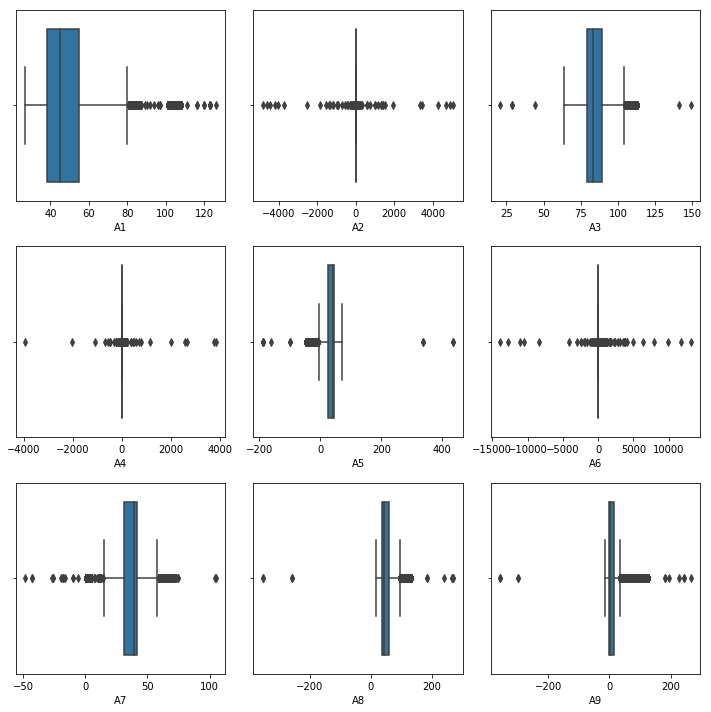

In [22]:
# Visualize the Outlier in each independent continuous variable
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(data_train["A1"])
plt.subplot(3,3,2)
sns.boxplot(data_train["A2"])
plt.subplot(3,3,3)
sns.boxplot(data_train["A3"])
plt.subplot(3,3,4)
sns.boxplot(data_train["A4"])
plt.subplot(3,3,5)
sns.boxplot(data_train["A5"])
plt.subplot(3,3,6)
sns.boxplot(data_train["A6"])
plt.subplot(3,3,7)
sns.boxplot(data_train["A7"])
plt.subplot(3,3,8)
sns.boxplot(data_train["A8"])
plt.subplot(3,3,9)
sns.boxplot(data_train["A9"])
plt.tight_layout()

- Outliers exists in all the continuous variables

C:\Users\abhay\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log1p
  
C:\Users\abhay\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log1p
  
C:\Users\abhay\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log1p
  # Remove the CWD from sys.path while we load stuff.
C:\Users\abhay\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log1p
  # Remove the CWD from sys.path while we load stuff.
C:\Users\abhay\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log1p
  if sys.path[0] == '':
C:\Users\abhay\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log1p
  
C:\Users\abhay\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log1p
  
C:\Users\abhay\

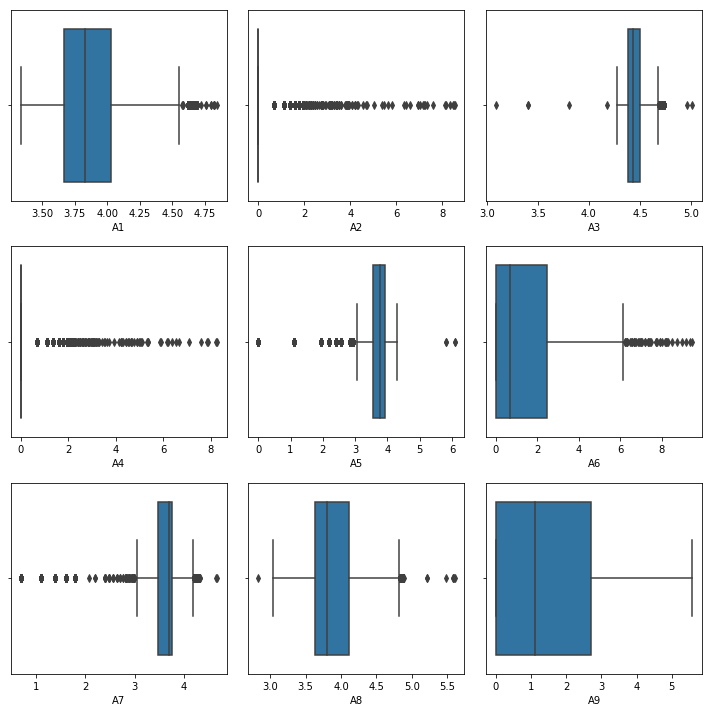

In [196]:
# Visualize the Outlier in each independent continuous variable
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(np.log1p(data_train["A1"]))
plt.subplot(3,3,2)
sns.boxplot(np.log1p(data_train["A2"]))
plt.subplot(3,3,3)
sns.boxplot(np.log1p(data_train["A3"]))
plt.subplot(3,3,4)
sns.boxplot(np.log1p(data_train["A4"]))
plt.subplot(3,3,5)
sns.boxplot(np.log1p(data_train["A5"]))
plt.subplot(3,3,6)
sns.boxplot(np.log1p(data_train["A6"]))
plt.subplot(3,3,7)
sns.boxplot(np.log1p(data_train["A7"]))
plt.subplot(3,3,8)
sns.boxplot(np.log1p(data_train["A8"]))
plt.subplot(3,3,9)
sns.boxplot(np.log1p(data_train["A9"]))
plt.tight_layout()

- Log transformation didn't help much. So, capping the variables between 3 IQR Range

In [197]:
# Creating a copy of the data
data_train1=data_train
data_test1=data_test

In [198]:
# calculate upper bound for A1
IQR = data_train1.A1.quantile(0.75) - data_train1.A1.quantile(0.25)
upper_bound = data_train1.A1.quantile(0.75) + 3*IQR
lower_bound = data_train1.A1.quantile(0.25) - 3*IQR

data_train1.loc[data_train1.A1 >upper_bound, 'A1'] = upper_bound 
data_train1.loc[data_train1.A1 <lower_bound, 'A1'] = lower_bound 

# calculate upper bound for A2
IQR = data_train1.A2.quantile(0.75) - data_train1.A2.quantile(0.25)
upper_bound = data_train1.A2.quantile(0.75) + 3*IQR
lower_bound = data_train1.A2.quantile(0.25) - 3*IQR

data_train1.loc[data_train1.A2 >upper_bound, 'A2'] = upper_bound 
data_train1.loc[data_train1.A2 <lower_bound, 'A2'] = lower_bound 

# calculate upper bound for A3
IQR = data_train1.A3.quantile(0.75) - data_train1.A3.quantile(0.25)
upper_bound = data_train1.A3.quantile(0.75) + 3*IQR
lower_bound = data_train1.A3.quantile(0.25) - 3*IQR

data_train1.loc[data_train1.A3 >upper_bound, 'A3'] = upper_bound 
data_train1.loc[data_train1.A3 <lower_bound, 'A3'] = lower_bound 

# calculate upper bound for A4
IQR = data_train1.A4.quantile(0.75) - data_train1.A4.quantile(0.25)
upper_bound = data_train1.A4.quantile(0.75) + 3*IQR
lower_bound = data_train1.A4.quantile(0.25) - 3*IQR

data_train1.loc[data_train1.A4 >upper_bound, 'A4'] = upper_bound 
data_train1.loc[data_train1.A4 <lower_bound, 'A4'] = lower_bound 

# calculate upper bound for A5
IQR = data_train1.A5.quantile(0.75) - data_train1.A5.quantile(0.25)
upper_bound = data_train1.A5.quantile(0.75) + 3*IQR
lower_bound = data_train1.A5.quantile(0.25) - 3*IQR

data_train1.loc[data_train1.A5 >upper_bound, 'A5'] = upper_bound 
data_train1.loc[data_train1.A5 <lower_bound, 'A5'] = lower_bound 

# calculate upper bound for A6
IQR = data_train1.A6.quantile(0.75) - data_train1.A6.quantile(0.25)
upper_bound = data_train1.A6.quantile(0.75) + 3*IQR
lower_bound = data_train1.A6.quantile(0.25) - 3*IQR

data_train1.loc[data_train1.A6 >upper_bound, 'A6'] = upper_bound 
data_train1.loc[data_train1.A6 <lower_bound, 'A6'] = lower_bound 

# calculate upper bound for A7
IQR = data_train1.A7.quantile(0.75) - data_train1.A7.quantile(0.25)
upper_bound = data_train1.A7.quantile(0.75) + 3*IQR
lower_bound = data_train1.A7.quantile(0.25) - 3*IQR

data_train1.loc[data_train1.A7 >upper_bound, 'A7'] = upper_bound 
data_train1.loc[data_train1.A7 <lower_bound, 'A7'] = lower_bound

# calculate upper bound for A8
IQR = data_train1.A8.quantile(0.75) - data_train1.A8.quantile(0.25)
upper_bound = data_train1.A8.quantile(0.75) + 3*IQR
lower_bound = data_train1.A8.quantile(0.25) - 3*IQR

data_train1.loc[data_train1.A8 >upper_bound, 'A8'] = upper_bound 
data_train1.loc[data_train1.A8 <lower_bound, 'A8'] = lower_bound 

# calculate upper bound for A9
IQR = data_train1.A9.quantile(0.75) - data_train1.A9.quantile(0.25)
upper_bound = data_train1.A9.quantile(0.75) + 3*IQR
lower_bound = data_train1.A9.quantile(0.25) - 3*IQR

data_train1.loc[data_train1.A9 >upper_bound, 'A9'] = upper_bound 
data_train1.loc[data_train1.A9 <lower_bound, 'A9'] = lower_bound 

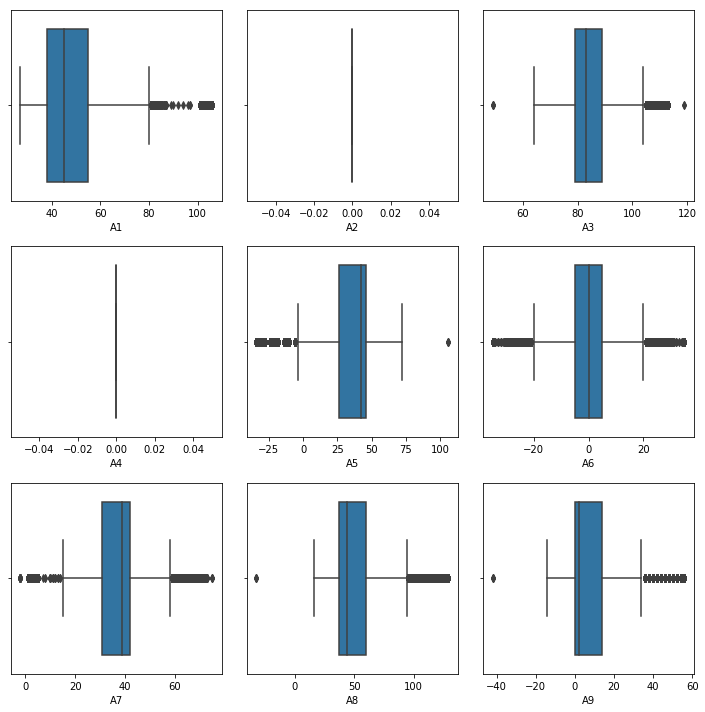

In [199]:
# Visualize the dataset after outlier removal
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(data_train1["A1"])
plt.subplot(3,3,2)
sns.boxplot(data_train1["A2"])
plt.subplot(3,3,3)
sns.boxplot(data_train1["A3"])
plt.subplot(3,3,4)
sns.boxplot(data_train1["A4"])
plt.subplot(3,3,5)
sns.boxplot(data_train1["A5"])
plt.subplot(3,3,6)
sns.boxplot(data_train1["A6"])
plt.subplot(3,3,7)
sns.boxplot(data_train1["A7"])
plt.subplot(3,3,8)
sns.boxplot(data_train1["A8"])
plt.subplot(3,3,9)
sns.boxplot(data_train1["A9"])
plt.tight_layout()

In [200]:
#Test after Outlier removal
t,p =stats.ttest_ind(data_train1[data_train1["Category"]==0].A1,
               data_train1[data_train1["Category"]==1].A1)
print ('t-test between Category and A1')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A1 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train1[data_train1["Category"]==0].A2,
               data_train1[data_train1["Category"]==1].A2)
print ('t-test between Category and A2')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A2 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train1[data_train1["Category"]==0].A3,
               data_train1[data_train1["Category"]==1].A3)
print ('t-test between Category and A3')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A3 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train1[data_train1["Category"]==0].A4,
               data_train1[data_train1["Category"]==1].A4)
print ('t-test between Category and A4')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A4 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train1[data_train1["Category"]==0].A5,
               data_train1[data_train1["Category"]==1].A5)
print ('t-test between Category and A5')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A5 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train1[data_train1["Category"]==0].A6,
               data_train1[data_train1["Category"]==1].A6)
print ('t-test between Category and A6')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A6 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train1[data_train1["Category"]==0].A7,
               data_train1[data_train1["Category"]==1].A7)
print ('t-test between Category and A7')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A7 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train1[data_train1["Category"]==0].A8,
               data_train1[data_train1["Category"]==1].A8)
print ('t-test between Category and A8')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A8 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')
t,p =stats.ttest_ind(data_train1[data_train1["Category"]==0].A9,
               data_train1[data_train1["Category"]==1].A9)
print ('t-test between Category and A9')
print ('==============================')
print ('t Statistic:', t)
print ('p value:', p, '\n')
if(p<0.05):
    print("For A9 mean of two Categories are statistically different from each other")
print ('***************************************************************************************')

t-test between Category and A1
t Statistic: -186.08645716417203
p value: 0.0 

For A1 mean of two Categories are statistically different from each other
***************************************************************************************
t-test between Category and A2
t Statistic: nan
p value: nan 

***************************************************************************************
t-test between Category and A3
t Statistic: -28.23578486680794
p value: 7.929699960800862e-174 

For A3 mean of two Categories are statistically different from each other
***************************************************************************************
t-test between Category and A4
t Statistic: nan
p value: nan 

***************************************************************************************
t-test between Category and A5
t Statistic: 96.32937025520648
p value: 0.0 

For A5 mean of two Categories are statistically different from each other
***********************************************

C:\Users\abhay\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\abhay\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\abhay\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


- After capping the variables A2,A4 and A6 became significant

# 7. Split the dataset

In [224]:
X=data_train1[["A1","A2","A3","A4","A5","A6","A7","A8","A9"]]
y=data_train1["Category"]

In [225]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=0.2,random_state=5)

In [226]:
print(X_train.shape)
print(y_train.shape)

(34800, 9)
(34800,)


# 8. Train the Model

# 8.1 Logistic Regression

In [202]:
## Train the Logistic Regression Model and Predcit for test data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_validation)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))
print(accuracy_score(y_validation, y_pred))

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[6690   92]
 [ 259 1659]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6782
           1       0.95      0.86      0.90      1918

    accuracy                           0.96      8700
   macro avg       0.96      0.93      0.94      8700
weighted avg       0.96      0.96      0.96      8700

0.9596551724137931


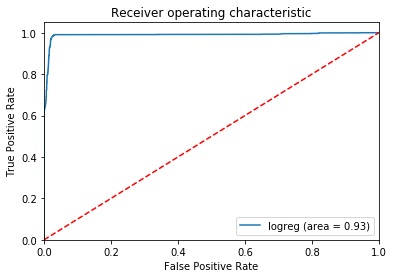

In [203]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg_roc_auc = roc_auc_score(y_validation, logreg.predict(X_validation))
fpr, tpr, thresholds = roc_curve(y_validation, logreg.predict_proba(X_validation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='logreg (area = %0.2f)' % logreg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [231]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Category   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     5852.
Date:                Sat, 10 Aug 2019   Prob (F-statistic):               0.00
Time:                        02:28:21   Log-Likelihood:                -2368.4
No. Observations:               34800   AIC:                             4757.
Df Residuals:                   34790   BIC:                             4841.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7806      0.014    -57.300      0.0

- All the independent variables except A4 are significant. We will remove A4 and run the regression once more.

# 8.1.1 Logistic Regression_1

In [236]:
X=data_train1[["A1","A2","A3","A5","A6","A7","A8","A9"]]
y=data_train1["Category"]

In [237]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=0.2,random_state=5)

In [238]:
## Train the Logistic Regression Model and Predcit for test data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_validation)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))
print(accuracy_score(y_validation, y_pred))

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[6690   92]
 [ 259 1659]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6782
           1       0.95      0.86      0.90      1918

    accuracy                           0.96      8700
   macro avg       0.96      0.93      0.94      8700
weighted avg       0.96      0.96      0.96      8700

0.9596551724137931


In [241]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Category   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     9897.
Date:                Sat, 10 Aug 2019   Prob (F-statistic):               0.00
Time:                        02:33:39   Log-Likelihood:                 657.45
No. Observations:               34800   AIC:                            -1299.
Df Residuals:                   34792   BIC:                            -1231.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8779      0.013    -70.147      0.0

- All the independent variables except A6 are significant. We will remove A6 and run the regression once more.

# 8.1.2 Logistic Regression_2

In [242]:
X=data_train1[["A1","A2","A3","A5","A7","A8","A9"]]
y=data_train1["Category"]

In [243]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=0.2,random_state=5)

In [244]:
## Train the Logistic Regression Model and Predcit for test data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_validation)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))
print(accuracy_score(y_validation, y_pred))

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[6690   92]
 [ 259 1659]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6782
           1       0.95      0.86      0.90      1918

    accuracy                           0.96      8700
   macro avg       0.96      0.93      0.94      8700
weighted avg       0.96      0.96      0.96      8700

0.9596551724137931


In [245]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Category   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                 1.155e+04
Date:                Sat, 10 Aug 2019   Prob (F-statistic):               0.00
Time:                        02:35:13   Log-Likelihood:                 656.51
No. Observations:               34800   AIC:                            -1299.
Df Residuals:                   34793   BIC:                            -1240.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8778      0.013    -70.136      0.0

- This is our final logistic regression model. With this model False Negetives are very high, so we will try other ML algos.

# 8.2 Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [162]:
X=data_train[["A1","A2","A3","A4","A5","A6","A7","A8","A9"]]
y=data_train["Category"]

In [163]:
# splitting the data into training and test sets (80:20)
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=0.2,random_state=4)

Model accuracy :  1.0
[[6798    0]
 [   0 1902]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6798
           1       1.00      1.00      1.00      1902

    accuracy                           1.00      8700
   macro avg       1.00      1.00      1.00      8700
weighted avg       1.00      1.00      1.00      8700

1.0


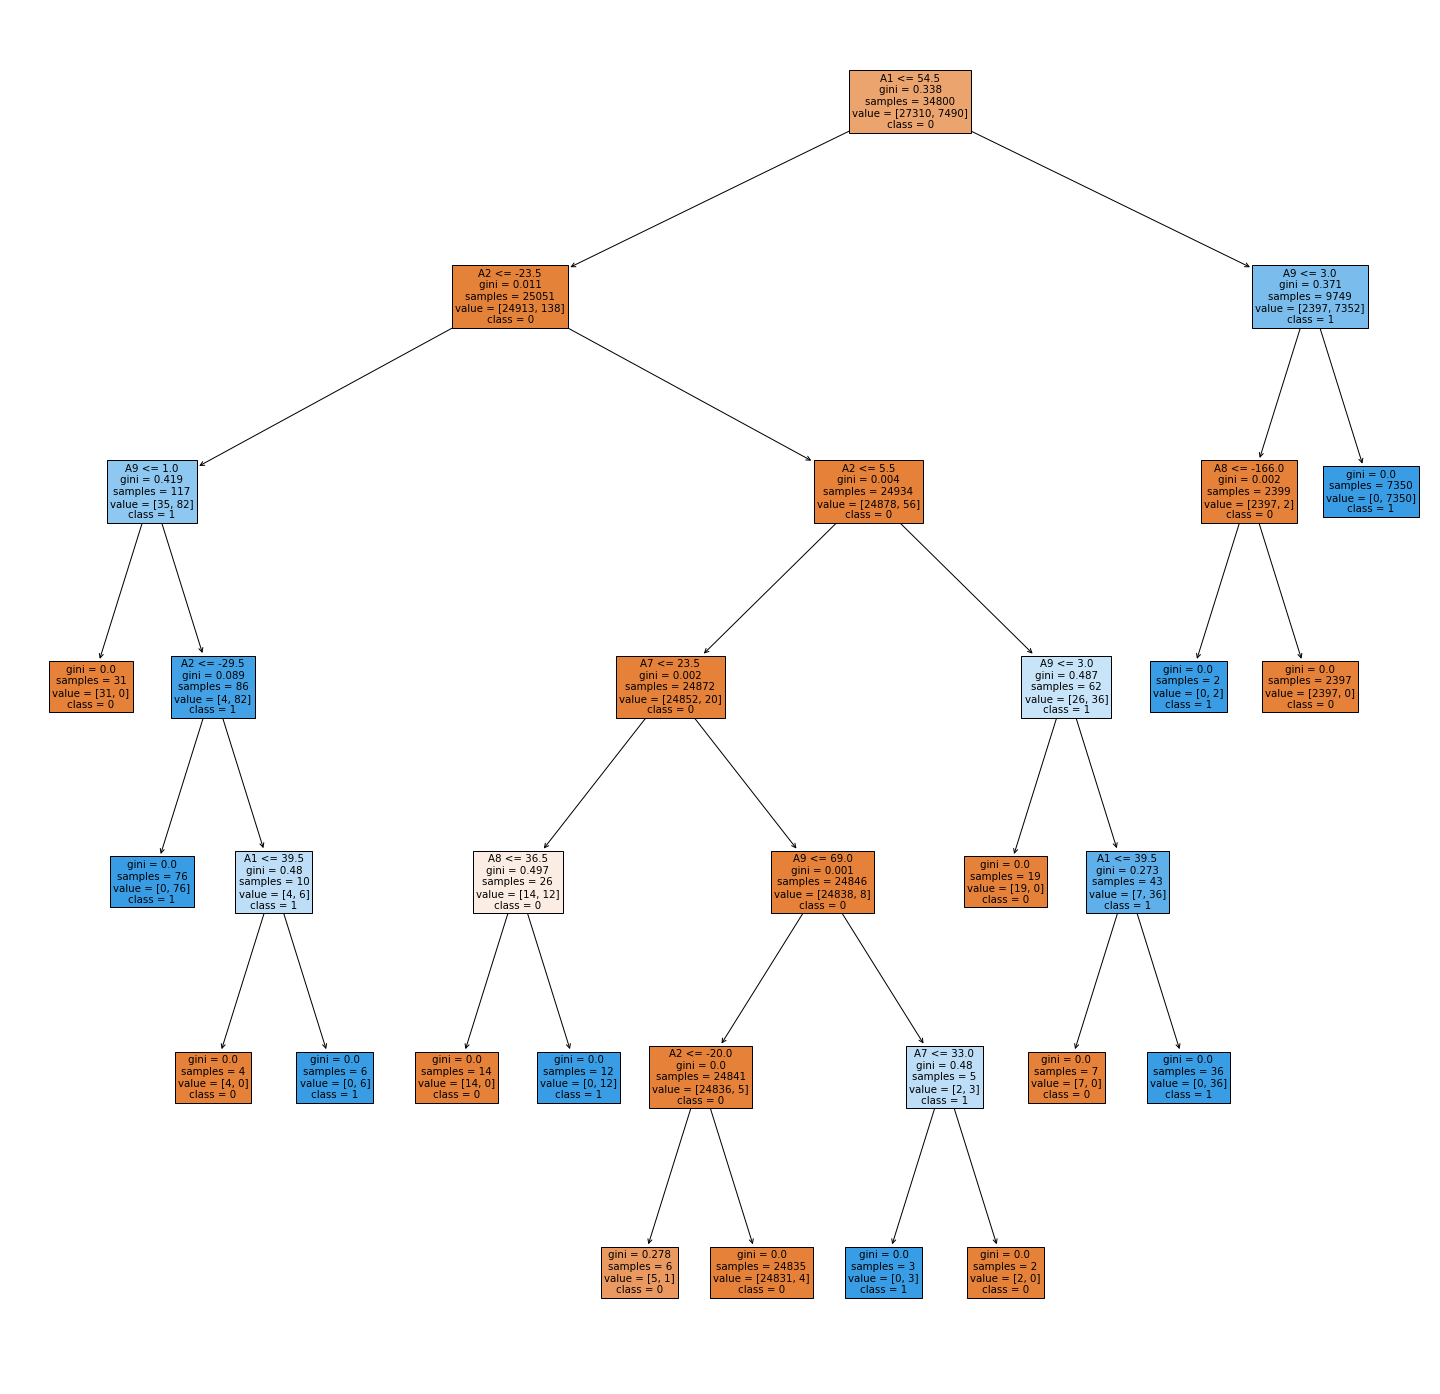

In [164]:
plt.figure(figsize=[25,25])
clf_dt = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)

y_pred = clf_dt.predict(X_validation)
score = accuracy_score(y_validation,y_pred)

print('Model accuracy : ', score)
# setting performance parameters
print(confusion_matrix(y_validation,y_pred))  
print(classification_report(y_validation,y_pred))  
print(accuracy_score(y_validation, y_pred)) 
plot_tree(clf_dt, filled=True,feature_names=X.columns,class_names=["0","1"])
plt.show()

- With Depth = 3 there are 0 FN and FP, this is the best model till now. Let's apply cross validation on this.

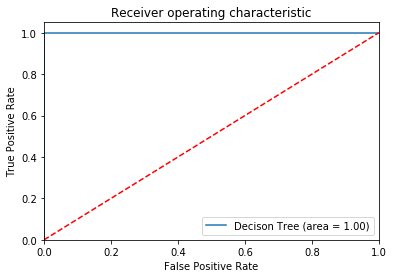

In [165]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_validation, clf_dt.predict(X_validation))
fpr, tpr, thresholds = roc_curve(y_validation, clf_dt.predict_proba(X_validation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decison Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 8.2.1 Cross Validation - Decision Tree

In [58]:
X=data_train[["A1","A2","A3","A4","A5","A6","A7","A8","A9"]]
y=data_train["Category"]

In [59]:
from sklearn.model_selection import StratifiedKFold

In [60]:
skf = StratifiedKFold(n_splits=5,random_state=2)
skf.get_n_splits(X,y)
# X is the feature set and y is the target
for train_index, val_index in skf.split(X,y): 
    print("Train:", train_index, "Validation:", val_index) 
    X_train, X_validation = X.iloc[train_index], X.iloc[val_index] 
    y_train, y_validation = y.iloc[train_index], y.iloc[val_index]

Train: [ 8683  8684  8687 ... 43497 43498 43499] Validation: [   0    1    2 ... 8746 8752 8753]
Train: [    0     1     2 ... 43497 43498 43499] Validation: [ 8683  8684  8687 ... 17592 17599 17603]
Train: [    0     1     2 ... 43497 43498 43499] Validation: [17335 17336 17337 ... 26254 26263 26264]
Train: [    0     1     2 ... 43497 43498 43499] Validation: [26067 26068 26069 ... 34811 34814 34815]
Train: [    0     1     2 ... 34811 34814 34815] Validation: [34750 34751 34752 ... 43497 43498 43499]


Model accuracy :  0.9997700885159214
[[6820    1]
 [   1 1877]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6821
           1       1.00      1.00      1.00      1878

    accuracy                           1.00      8699
   macro avg       1.00      1.00      1.00      8699
weighted avg       1.00      1.00      1.00      8699

0.9997700885159214


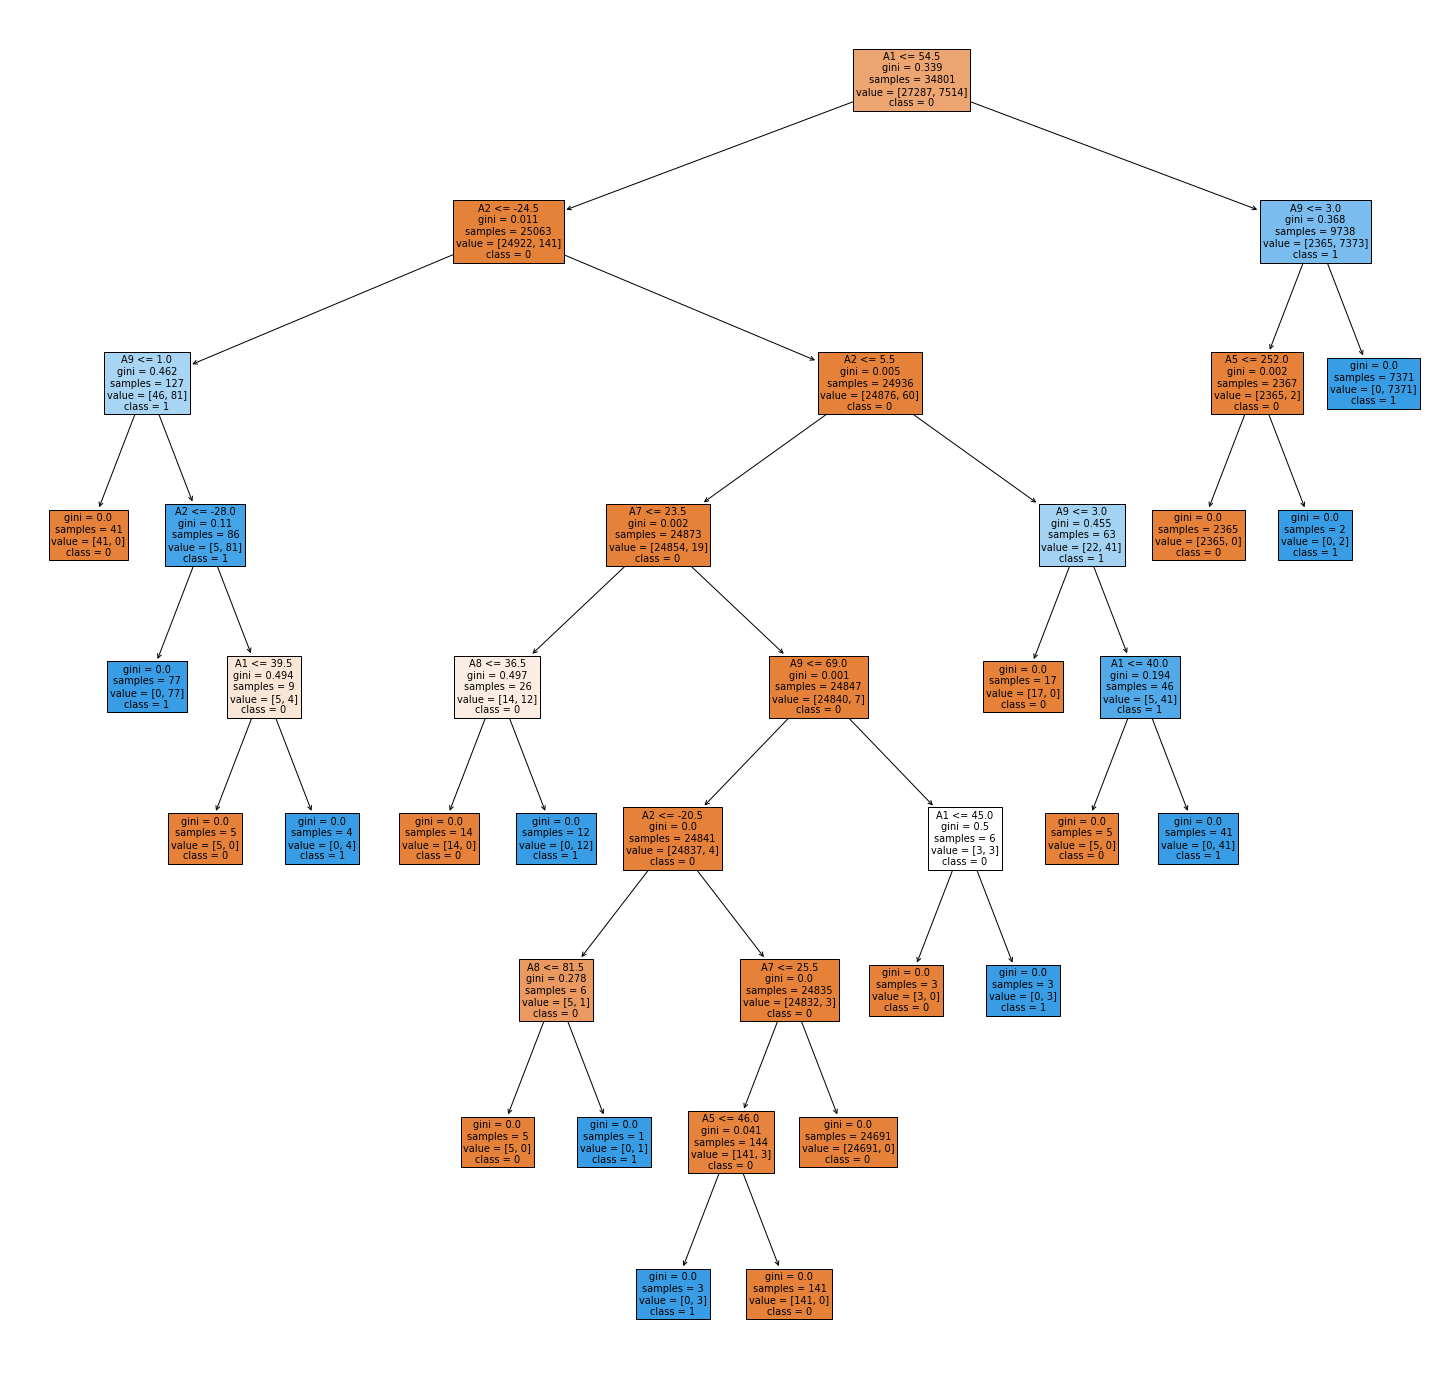

In [26]:
plt.figure(figsize=[25,25])
clf_dt = DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)

y_pred = clf_dt.predict(X_validation)
score = accuracy_score(y_validation,y_pred)

print('Model accuracy : ', score)
# setting performance parameters
print(confusion_matrix(y_validation,y_pred))  
print(classification_report(y_validation,y_pred))  
print(accuracy_score(y_validation, y_pred)) 
plot_tree(clf_dt, filled=True,feature_names=X.columns,class_names=["0","1"])
plt.show()

- With Stratified k-fold Cross Validation – At Depth = 8 there are 1 FN and 1 FP. This is the most accurate model gained in decision tree (with Stratified k-fold Cross Validation)

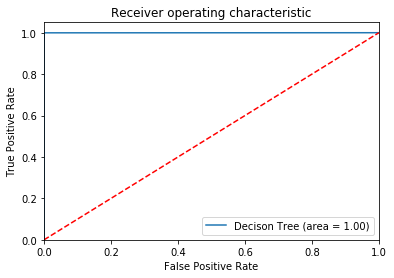

In [27]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_validation, clf_dt.predict(X_validation))
fpr, tpr, thresholds = roc_curve(y_validation, clf_dt.predict_proba(X_validation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decison Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 8.3 KNN Classifier

In [33]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 20 and record testing accuracy
k_range = range(1,20)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_validation)
        scores[k] = metrics.accuracy_score(y_validation,y_pred)
        scores_list.append(metrics.accuracy_score(y_validation,y_pred))

Text(0,0.5,'Testing Accuracy')

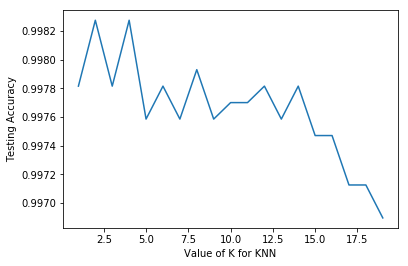

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [39]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_validation)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation,y_pred)) 
print(accuracy_score(y_validation, y_pred))

[[6792    6]
 [   9 1893]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6798
           1       1.00      1.00      1.00      1902

    accuracy                           1.00      8700
   macro avg       1.00      1.00      1.00      8700
weighted avg       1.00      1.00      1.00      8700

0.9982758620689656


- With k = 4 there are 9 FN and 6 FP, this is the best model till got by KNN. This is better than logistic, but inferior to Decision Tree

# 8.4 SVM Classifier with Linear Kernel

In [100]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_validation)
print(confusion_matrix(y_validation,y_pred))  
print(classification_report(y_validation,y_pred))  
print(accuracy_score(y_validation, y_pred)) 

[[6697  124]
 [  38 1840]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6821
           1       0.94      0.98      0.96      1878

    accuracy                           0.98      8699
   macro avg       0.97      0.98      0.97      8699
weighted avg       0.98      0.98      0.98      8699

0.981377169789631


# 8.6 SVM Classifier with Radial based kernel

In [101]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_validation)
print(confusion_matrix(y_validation,y_pred))  
print(classification_report(y_validation,y_pred))  
print(accuracy_score(y_validation, y_pred)) 

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[6821    0]
 [  27 1851]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6821
           1       1.00      0.99      0.99      1878

    accuracy                           1.00      8699
   macro avg       1.00      0.99      1.00      8699
weighted avg       1.00      1.00      1.00      8699

0.9968961949649385


- Radial Kernal in SVM gives a better estimation but this algo is still inferior to Decision Tree

# 8.7 Random Forest - with Cross Validation

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Create the model with 1000 trees
rf = RandomForestClassifier(n_estimators=1000,max_depth=7,random_state=4)
# Fit on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(X_validation)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))
print(accuracy_score(y_validation, y_pred))

[[6820    1]
 [   0 1878]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6821
           1       1.00      1.00      1.00      1878

    accuracy                           1.00      8699
   macro avg       1.00      1.00      1.00      8699
weighted avg       1.00      1.00      1.00      8699

0.9998850442579607


- With Stratified k-fold Cross Validation – At n_estimators = 1000 and Depth = 7 there are 0 FN and 1 FP

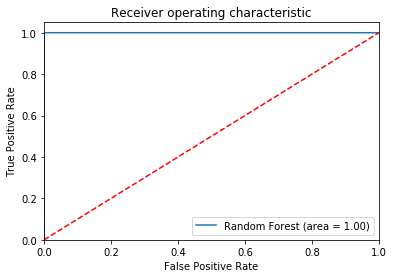

In [48]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_validation, rf.predict(X_validation))
fpr, tpr, thresholds = roc_curve(y_validation, rf.predict_proba(X_validation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

No handles with labels found to put in legend.


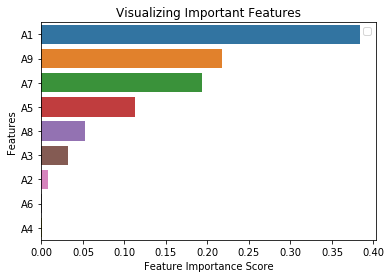

In [49]:
#Check feature importance
feature_imp = pd.Series(rf.feature_importances_,index=X_validation.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

- From Feature Importance graph we can see that A4 and A6 are not important variables. This validates the fact which we found in our statistical test (t-test for A4 and A6 was not significant with Category).
- We will try to model without these 2 variables and see if we can get a better F1 Score.

# 8.8 Random Forest (with Cross Validation) upon removing 2 variables

In [98]:
X=data_train[["A1","A2","A3","A5","A7","A8","A9"]]
y=data_train["Category"]

In [99]:
skf1 = StratifiedKFold(n_splits=5,random_state=2)
skf1.get_n_splits(X,y)
# X is the feature set and y is the target
for train_index, val_index in skf1.split(X,y): 
    print("Train:", train_index, "Validation:", val_index) 
    X_train, X_validation = X.iloc[train_index], X.iloc[val_index] 
    y_train, y_validation = y.iloc[train_index], y.iloc[val_index]

Train: [ 8683  8684  8687 ... 43497 43498 43499] Validation: [   0    1    2 ... 8746 8752 8753]
Train: [    0     1     2 ... 43497 43498 43499] Validation: [ 8683  8684  8687 ... 17592 17599 17603]
Train: [    0     1     2 ... 43497 43498 43499] Validation: [17335 17336 17337 ... 26254 26263 26264]
Train: [    0     1     2 ... 43497 43498 43499] Validation: [26067 26068 26069 ... 34811 34814 34815]
Train: [    0     1     2 ... 34811 34814 34815] Validation: [34750 34751 34752 ... 43497 43498 43499]


In [91]:
# Create the model with 500 trees
rf1 = RandomForestClassifier(n_estimators=500,max_depth=7,random_state=4)
# Fit on training data
rf1.fit(X_train, y_train)
# Use the forest's predict method on the test data
y_pred = rf1.predict(X_validation)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))
print(accuracy_score(y_validation, y_pred))

[[6821    0]
 [   0 1878]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6821
           1       1.00      1.00      1.00      1878

    accuracy                           1.00      8699
   macro avg       1.00      1.00      1.00      8699
weighted avg       1.00      1.00      1.00      8699

1.0


- With Stratified k-fold Cross Validation – At n_estimators = 500 and Depth = 7 there are 0 FN and 0 FP. This is the most accurate model gained in Random forest (with Stratified k-fold Cross Validation)

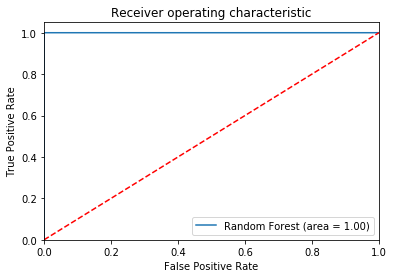

In [92]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf1_roc_auc = roc_auc_score(y_validation, rf1.predict(X_validation))
fpr, tpr, thresholds = roc_curve(y_validation, rf1.predict_proba(X_validation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf1_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

No handles with labels found to put in legend.


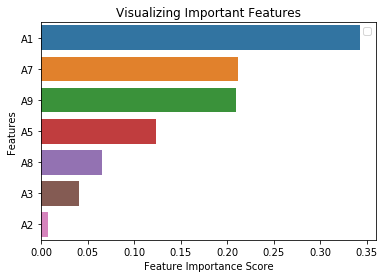

In [93]:
#Check feature importance
feature_imp = pd.Series(rf1.feature_importances_,index=X_validation.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# 8.8 XGBM - with Cross Validation

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
xg = GradientBoostingClassifier(n_estimators=500,max_depth=8,learning_rate=0.1,random_state=4)
# Fit on training data
xg.fit(X_train, y_train)
# Use the forest's predict method on the test data
y_pred = xg.predict(X_validation)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))
print(accuracy_score(y_validation, y_pred))

[[6820    1]
 [   0 1878]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6821
           1       1.00      1.00      1.00      1878

    accuracy                           1.00      8699
   macro avg       1.00      1.00      1.00      8699
weighted avg       1.00      1.00      1.00      8699

0.9998850442579607


- 1 FN and 1 FP is the best that can be acheived by XGBM algorithm with Stratified k-fold Cross Validation
- Need to check for the feature Importance

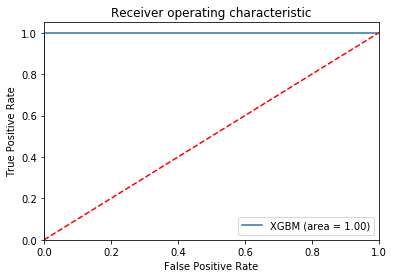

In [84]:
##########Generating AUC plot and ROC curve#############
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
xg_roc_auc = roc_auc_score(y_validation, xg.predict(X_validation))
fpr, tpr, thresholds = roc_curve(y_validation, xg.predict_proba(X_validation)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBM (area = %0.2f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

No handles with labels found to put in legend.


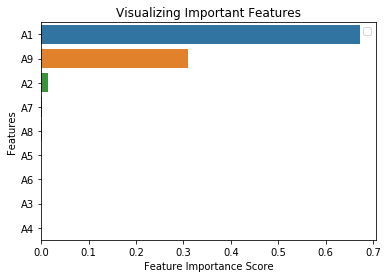

In [85]:
#Check feature importance
feature_imp = pd.Series(xg.feature_importances_,index=X_validation.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

- There is an overemphasis on only few of the variables in XGBM
- As we don't know about the variables we are not able to judge if this makes any business sense
- If we drop 6 variables, then we may face an issue in the unseen data, as only few variables maynot be able to explain the variability in the unseen data

# 9. Test on Unseen Data

- Random forest(Stratified k-fold Cross Validation) is the best model as it has 0 FN and 0 FP.
- We will use this model on the unseen data(test.csv)
- Need to remove 2 Variables A4 and A6 from the test.csv

In [87]:
data_test.drop(["A4","A6"],axis=1,inplace=True)

In [88]:
data_test.head()

,A1,A2,A3,A5,A7,A8,A9
0,55,0,81,-6,25,88,64
1,56,0,96,52,40,44,4
2,50,-1,89,50,39,40,2
3,53,9,79,42,25,37,12
4,55,2,82,54,26,28,2


In [94]:
data_test["Category"]=rf1.predict(data_test)

In [97]:
data_test.to_csv("Submission.csv")

In [95]:
data_test.head()

,A1,A2,A3,A5,A7,A8,A9,Category
0,55,0,81,-6,25,88,64,1
1,56,0,96,52,40,44,4,1
2,50,-1,89,50,39,40,2,0
3,53,9,79,42,25,37,12,1
4,55,2,82,54,26,28,2,0


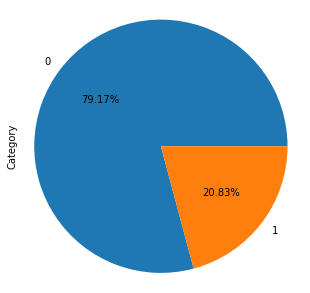

In [96]:
# Pie Plot to Visualise the Target Variable
plt.figure(figsize=(5,5))
data_test["Category"].value_counts().plot.pie(autopct='%1.2f%%')
plt.axis('equal')
plt.show()

# Approach 2 - Treat as a MultiClass Problem

# 1. Data Exploration

In [133]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [134]:
# Rename the variables

train_data.rename(columns={'0':'A1','1':'A2','2':'A3','3':'A4','4':'A5','5':'A6','6':'A7','7':'A8','8':'A9'},inplace=True)
test_data.rename(columns={'0':'A1','1':'A2','2':'A3','3':'A4','4':'A5','5':'A6','6':'A7','7':'A8','8':'A9'},inplace=True)

In [135]:
p=train_data.groupby(["Category"]).A1.count().to_frame().rename(columns={'A1':'count_Category'}).reset_index()
p["Category %age"]=p["count_Category"]*100/len(train_data)
p

,Category,count_Category,Category %age
0,1,34108,78.409195
1,2,37,0.085057
2,3,132,0.303448
3,4,6748,15.512644
4,5,2458,5.650575
5,6,6,0.013793
6,7,11,0.025287


In [136]:
# Dropping Id from both Train and Test
train_data=train_data.drop("Id",axis=1)
test_data=test_data.drop("Id",axis=1)

# 2. Statistical Test

## 2.1 For Variable A1

In [112]:
f, p =stats.f_oneway(train_data[train_data["Category"]==1].A1,
                     train_data[train_data["Category"]==2].A1,
                     train_data[train_data["Category"]==3].A1,
                     train_data[train_data["Category"]==4].A1,
                     train_data[train_data["Category"]==5].A1,
                     train_data[train_data["Category"]==6].A1,
                     train_data[train_data["Category"]==7].A1)
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

mc = MultiComparison(train_data['A1'], train_data['Category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

One-way ANOVA
F value: 19519.459039789643
P value: 0.0 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  1      2    10.7288   7.6363  13.8212   True 
  1      3     9.6321   7.9926  11.2717   True 
  1      4    11.4644  11.2139  11.7149   True 
  1      5    43.4972  43.1045  43.8898   True 
  1      6    21.3594  13.6834  29.0354   True 
  1      7    -6.9739  -12.6435 -1.3044   True 
  2      3    -1.0966  -4.5939   2.4006  False 
  2      4     0.7356  -2.3636   3.8349  False 
  2      5    32.7684  29.6544  35.8824   True 
  2      6    10.6306   2.3563  18.9049   True 
  2      7    -17.7027 -24.1592 -11.2462  True 
  3      4     1.8323    0.18    3.4846   True 
  3      5    33.8651  32.1853  35.5448   True 
  3      6    11.7273   3.8794  19.5751   True 
  3      7    -16.6061 -22.5061 -10.706   True 
  4      5    32.0328  31.5898  32.4757   True 
  4      6     9.895    2.21

- There is a significant difference between the Categories for variable A1 - this is a significant variable

## 2.2 For Variable A2

In [113]:
f, p =stats.f_oneway(train_data[train_data["Category"]==1].A2,
                     train_data[train_data["Category"]==2].A2,
                     train_data[train_data["Category"]==3].A2,
                     train_data[train_data["Category"]==4].A2,
                     train_data[train_data["Category"]==5].A2,
                     train_data[train_data["Category"]==6].A2,
                     train_data[train_data["Category"]==7].A2)
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

mc = MultiComparison(train_data['A2'], train_data['Category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

One-way ANOVA
F value: 3900.3159391616323
P value: 0.0 

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff    lower      upper    reject
-----------------------------------------------------
  1      2     38.5264     7.9662    69.0866    True 
  1      3     -49.1044   -65.3066   -32.9022   True 
  1      4      0.688     -1.7873     3.1634   False 
  1      5     13.2019     9.3218     17.082    True 
  1      6    1239.2517  1163.3966  1315.1067   True 
  1      7    -2745.309  -2801.3357 -2689.2822  True 
  2      3     -87.6308  -122.1911   -53.0705   True 
  2      4     -37.8384   -68.4657   -7.2111    True 
  2      5     -25.3245   -56.0972    5.4481   False 
  2      6    1200.7252  1118.9579  1282.4925   True 
  2      7    -2783.8354 -2847.639  -2720.0318  True 
  3      4     49.7924    33.4641    66.1208    True 
  3      5     62.3063    45.7068    78.9057    True 
  3      6    1288.3561   1210.803  1365.9091   True 
  3      7    -2696.2045 

- There is a significant difference between the Categories for variable A2 - this is a significant variable

## 2.3 For Variable A3

In [114]:
f, p =stats.f_oneway(train_data[train_data["Category"]==1].A3,
                     train_data[train_data["Category"]==2].A3,
                     train_data[train_data["Category"]==3].A3,
                     train_data[train_data["Category"]==4].A3,
                     train_data[train_data["Category"]==5].A3,
                     train_data[train_data["Category"]==6].A3,
                     train_data[train_data["Category"]==7].A3)
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

mc = MultiComparison(train_data['A3'], train_data['Category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

One-way ANOVA
F value: 196.82625609373108
P value: 1.576736273558395e-248 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  1      2    -5.6625  -9.9258  -1.3992  True 
  1      3     5.7683   3.508    8.0286  True 
  1      4     1.8843   1.5389   2.2296  True 
  1      5     5.635    5.0937   6.1763  True 
  1      6    -2.0499  -12.632   8.5323 False 
  1      7     7.6471  -0.1689  15.4631 False 
  2      3    11.4308   6.6095  16.2521  True 
  2      4     7.5467   3.2741  11.8194  True 
  2      5    11.2975   7.0045  15.5904  True 
  2      6     3.6126  -7.7943  15.0196 False 
  2      7    13.3096   4.4087  22.2105  True 
  3      4    -3.8841   -6.162  -1.6062  True 
  3      5    -0.1333  -2.4491   2.1824 False 
  3      6    -7.8182  -18.6372  3.0009 False 
  3      7     1.8788  -6.2551  10.0126 False 
  4      5     3.7507   3.1401   4.3614  True 
  4      6    -3.9341   -14

- There is a significant difference between the Categories for variable A3 - this is a significant variable

## 2.4 For Variable A4

In [115]:
f, p =stats.f_oneway(train_data[train_data["Category"]==1].A4,
                     train_data[train_data["Category"]==2].A4,
                     train_data[train_data["Category"]==3].A4,
                     train_data[train_data["Category"]==4].A4,
                     train_data[train_data["Category"]==5].A4,
                     train_data[train_data["Category"]==6].A4,
                     train_data[train_data["Category"]==7].A4)
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

mc = MultiComparison(train_data['A4'], train_data['Category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

One-way ANOVA
F value: 0.9767699298650623
P value: 0.43899783858480856 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  1      2    -0.2947  -20.181  19.5915 False 
  1      3     2.5765  -7.9667  13.1196 False 
  1      4     0.3794  -1.2314   1.9901 False 
  1      5    -1.7638  -4.2887   0.761  False 
  1      6    -1.7947  -51.1554 47.5659 False 
  1      7     5.8871  -30.5708  42.345 False 
  2      3     2.8712  -19.618  25.3604 False 
  2      4     0.6741  -19.2558  20.604 False 
  2      5    -1.4691  -21.4936 18.5554 False 
  2      6      -1.5   -54.7079 51.7079 False 
  2      7     6.1818  -35.3367 47.7003 False 
  3      4    -2.1971  -12.8223  8.4281 False 
  3      5    -4.3403  -15.1419  6.4614 False 
  3      6    -4.3712  -54.8368 46.0944 False 
  3      7     3.3106  -34.6299 41.2511 False 
  4      5    -2.1432  -4.9914   0.705  False 
  4      6    -2.1741  -51.552

- There is NO significant difference between the Categories for variable A4 - this is NOT a significant variable

## 2.5 For Variable A5

In [116]:
f, p =stats.f_oneway(train_data[train_data["Category"]==1].A5,
                     train_data[train_data["Category"]==2].A5,
                     train_data[train_data["Category"]==3].A5,
                     train_data[train_data["Category"]==4].A5,
                     train_data[train_data["Category"]==5].A5,
                     train_data[train_data["Category"]==6].A5,
                     train_data[train_data["Category"]==7].A5)
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

mc = MultiComparison(train_data['A5'], train_data['Category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

One-way ANOVA
F value: 1795.5361436088767
P value: 0.0 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  1      2    -51.3005 -60.7243 -41.8767  True 
  1      3    -13.6858 -18.6821 -8.6896   True 
  1      4    -17.3905 -18.1538 -16.6272  True 
  1      5    -34.1805 -35.377  -32.984   True 
  1      6    -9.2465  -32.6378 14.1449  False 
  1      7    -8.3374  -25.6143  8.9396  False 
  2      3    37.6147  26.9573   48.272   True 
  2      4     33.91   24.4655  43.3545   True 
  2      5     17.12    7.6306  26.6093   True 
  2      6    42.0541  16.8395  67.2686   True 
  2      7    42.9631  23.2881  62.6382   True 
  3      4    -3.7046  -8.7398   1.3305  False 
  3      5    -20.4947 -25.6135 -15.3759  True 
  3      6     4.4394  -19.4756 28.3544  False 
  3      7     5.3485  -12.631   23.328  False 
  4      5    -16.7901 -18.1398 -15.4403  True 
  4      6     8.144   -15.2

- There is a significant difference between the Categories for variable A5 - this is a significant variable

## 2.6 For Variable A6

In [117]:
f, p =stats.f_oneway(train_data[train_data["Category"]==1].A6,
                     train_data[train_data["Category"]==2].A6,
                     train_data[train_data["Category"]==3].A6,
                     train_data[train_data["Category"]==4].A6,
                     train_data[train_data["Category"]==5].A6,
                     train_data[train_data["Category"]==6].A6,
                     train_data[train_data["Category"]==7].A6)
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

mc = MultiComparison(train_data['A6'], train_data['Category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

One-way ANOVA
F value: 1.2411989127148841
P value: 0.2814861003857563 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower    upper   reject
------------------------------------------------
  1      2    -0.7477   -87.7939 86.2985  False 
  1      3    -4.9234   -51.0729 41.2261  False 
  1      4    -3.5655   -10.6161  3.4851  False 
  1      5     7.8529    -3.199  18.9047  False 
  1      6    -0.5901  -216.6517 215.4716 False 
  1      7    -0.3325  -159.9163 159.2513 False 
  2      3    -4.1757  -102.6155 94.2641  False 
  2      4    -2.8178   -90.055  84.4194  False 
  2      5     8.6006   -79.0508 96.2519  False 
  2      6     0.1577  -232.7442 233.0595 False 
  2      7     0.4152  -181.3198 182.1502 False 
  3      4     1.3579   -45.1509 47.8667  False 
  3      5    12.7762   -34.5048 60.0573  False 
  3      6     4.3333  -216.5648 225.2315 False 
  3      7     4.5909  -161.4824 170.6642 False 
  4      5    11.4184   -1.0489  23.8857  Fa

- There is NO significant difference between the Categories for variable A6 - this is NOT a significant variable

## 2.7 For Variable A7

In [118]:
f, p =stats.f_oneway(train_data[train_data["Category"]==1].A7,
                     train_data[train_data["Category"]==2].A7,
                     train_data[train_data["Category"]==3].A7,
                     train_data[train_data["Category"]==4].A7,
                     train_data[train_data["Category"]==5].A7,
                     train_data[train_data["Category"]==6].A7,
                     train_data[train_data["Category"]==7].A7)
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

mc = MultiComparison(train_data['A7'], train_data['Category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

One-way ANOVA
F value: 6697.77711144754
P value: 0.0 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  1      2    -16.2446 -20.8377 -11.6515  True 
  1      3    -3.9399  -6.3751  -1.5048   True 
  1      4    -9.7732  -10.1453 -9.4012   True 
  1      5    -37.9107 -38.4938 -37.3275  True 
  1      6    -23.4248 -34.8255 -12.0241  True 
  1      7    14.6055   6.1849  23.0261   True 
  2      3    12.3047   7.1104  17.4989   True 
  2      4     6.4714   1.8682  11.0745   True 
  2      5    -21.6661 -26.2911 -17.0411  True 
  2      6    -7.1802  -19.4694  5.1091  False 
  2      7    30.8501  21.2607  40.4395   True 
  3      4    -5.8333  -8.2874  -3.3792   True 
  3      5    -33.9707 -36.4656 -31.4759  True 
  3      6    -19.4848 -31.1407  -7.829   True 
  3      7    18.5455   9.7825  27.3085   True 
  4      5    -28.1374 -28.7953 -27.4796  True 
  4      6    -13.6516 -25.056

- There is a significant difference between the Categories for variable A7 - this is a significant variable

## 2.8 For Variable A8

In [119]:
f, p =stats.f_oneway(train_data[train_data["Category"]==1].A8,
                     train_data[train_data["Category"]==2].A8,
                     train_data[train_data["Category"]==3].A8,
                     train_data[train_data["Category"]==4].A8,
                     train_data[train_data["Category"]==5].A8,
                     train_data[train_data["Category"]==6].A8,
                     train_data[train_data["Category"]==7].A8)
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

mc = MultiComparison(train_data['A8'], train_data['Category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

One-way ANOVA
F value: 2740.4184003198534
P value: 0.0 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  1      2    46.6791  37.8112  55.5469   True 
  1      3    19.4985   14.797  24.1999   True 
  1      4    19.6365  18.9183  20.3548   True 
  1      5    40.5952  39.4693  41.7211   True 
  1      6     6.8773  -15.134  28.8885  False 
  1      7    15.6348  -0.6228  31.8924  False 
  2      3    -27.1806 -37.2091 -17.152   True 
  2      4    -27.0425 -35.9298 -18.1552  True 
  2      5    -6.0839  -15.0134  2.8456  False 
  2      6    -39.8018 -63.5287 -16.0749  True 
  2      7    -31.0442 -49.5585  -12.53   True 
  3      4     0.1381    -4.6    4.8762  False 
  3      5    21.0967   16.28   25.9135   True 
  3      6    -12.6212 -35.1252  9.8828  False 
  3      7    -3.8636  -20.7824 13.0551  False 
  4      5    20.9586  19.6885  22.2287   True 
  4      6    -12.7593 -34.7

- There is a significant difference between the Categories for variable A8 - this is a significant variable

## 2.9 For Variable A9

In [120]:
f, p =stats.f_oneway(train_data[train_data["Category"]==1].A9,
                     train_data[train_data["Category"]==2].A9,
                     train_data[train_data["Category"]==3].A9,
                     train_data[train_data["Category"]==4].A9,
                     train_data[train_data["Category"]==5].A9,
                     train_data[train_data["Category"]==6].A9,
                     train_data[train_data["Category"]==7].A9)
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

mc = MultiComparison(train_data['A9'], train_data['Category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

One-way ANOVA
F value: 11257.04336881554
P value: 0.0 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  1      2    62.6739  54.8882  70.4595   True 
  1      3    23.3942  19.2665  27.5219   True 
  1      4     29.168  28.5373  29.7986   True 
  1      5    78.1755   77.187   79.164   True 
  1      6    30.1063  10.7812  49.4314   True 
  1      7     1.4699  -12.8036 15.7435  False 
  2      3    -39.2797 -48.0844 -30.475   True 
  2      4    -33.5059 -41.3086 -25.7032  True 
  2      5    15.5016   7.6618  23.3414   True 
  2      6    -32.5676 -53.3989 -11.7362  True 
  2      7    -61.2039 -77.4588 -44.9491  True 
  3      4     5.7738   1.6139   9.9336   True 
  3      5    54.7813  50.5523  59.0102   True 
  3      6     6.7121  -13.0456 26.4698  False 
  3      7    -21.9242 -36.7783 -7.0702   True 
  4      5    49.0075  47.8924  50.1226   True 
  4      6     0.9384  -18.39

- There is a significant difference between the Categories for variable A9 - this is a significant variable

# 3. Split the Data - Stratified Cross Validation

In [116]:
X=train_data[["A1","A2","A3","A5","A7","A8","A9"]]
y=train_data["Category"]

In [117]:
from sklearn.model_selection import StratifiedKFold

In [118]:
skf = StratifiedKFold(random_state=4)
skf.get_n_splits(X,y)
# X is the feature set and y is the target
for train_index, val_index in skf.split(X,y): 
    print("Train:", train_index, "Validation:", val_index) 
    X_train, X_validation = X.iloc[train_index], X.iloc[val_index] 
    y_train, y_validation = y.iloc[train_index], y.iloc[val_index]

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Train: [ 9603 13626 14135 ... 43497 43498 43499] Validation: [    0     1     2 ... 14797 14909 15863]
Train: [    0     1     2 ... 43497 43498 43499] Validation: [ 9603 13626 14135 ... 29146 29159 29225]
Train: [    0     1     2 ... 29146 29159 29225] Validation: [24669 28765 28811 ... 43497 43498 43499]


# 4. Train the Model

# 4.1 KNN Classifier

In [13]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 20 and record testing accuracy
k_range = range(1,20)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_validation)
        scores[k] = metrics.accuracy_score(y_validation,y_pred)
        scores_list.append(metrics.accuracy_score(y_validation,y_pred))

Text(0,0.5,'Testing Accuracy')

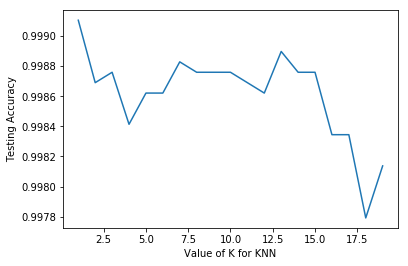

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_validation)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation,y_pred)) 
print(accuracy_score(y_validation, y_pred))

[[11365     0     4     0     0     0     0]
 [    0    12     0     0     0     0     0]
 [    5     0    39     0     0     0     0]
 [    0     0     0  2248     1     0     0]
 [    0     0     1     1   817     0     0]
 [    0     0     0     0     1     1     0]
 [    0     0     0     0     0     0     3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11369
           2       1.00      1.00      1.00        12
           3       0.89      0.89      0.89        44
           4       1.00      1.00      1.00      2249
           5       1.00      1.00      1.00       819
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00     14498
   macro avg       0.98      0.91      0.94     14498
weighted avg       1.00      1.00      1.00     14498

0.9991033245964961


- This is a good model, but we can try to acheive a better F Score for class 3 and class 6

# 4.2 SVM Classifier with Linear Kernel

In [23]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_validation)
print(confusion_matrix(y_validation,y_pred))  
print(classification_report(y_validation,y_pred))  
print(accuracy_score(y_validation, y_pred)) 

[[11164     1     0   204     0     0     0]
 [    4     7     0     1     0     0     0]
 [   34     0    10     0     0     0     0]
 [   49     0     0  2199     0     1     0]
 [    0     0     1     0   818     0     0]
 [    0     0     0     0     0     2     0]
 [    0     0     0     0     0     0     3]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.99     11369
           2       0.88      0.58      0.70        12
           3       0.91      0.23      0.36        44
           4       0.91      0.98      0.95      2249
           5       1.00      1.00      1.00       819
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         3

    accuracy                           0.98     14498
   macro avg       0.91      0.82      0.83     14498
weighted avg       0.98      0.98      0.98     14498

0.9796523658435646


- This is a poor model than KNN - As the F-Score for Class 1,2,3,4 decreases

# 4.3 SVM Classifier with Radial based kernel

In [24]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_validation)
print(confusion_matrix(y_validation,y_pred))  
print(classification_report(y_validation,y_pred))  
print(accuracy_score(y_validation, y_pred)) 

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[11369     0     0     0     0     0     0]
 [   12     0     0     0     0     0     0]
 [   41     0     3     0     0     0     0]
 [   12     0     0  2237     0     0     0]
 [   17     0     0     0   802     0     0]
 [    2     0     0     0     0     0     0]
 [    3     0     0     0     0     0     0]]
              precision    recall  f1-score   support

           1       0.99      1.00      1.00     11369
           2       0.00      0.00      0.00        12
           3       1.00      0.07      0.13        44
           4       1.00      0.99      1.00      2249
           5       1.00      0.98      0.99       819
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3

    accuracy                           0.99     14498
   macro avg       0.57      0.43      0.44     14498
weighted avg       0.99      0.99      0.99     14498

0.9939991722996275


C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- This is also not a good model as it fails to predict the correct values of Class 2, 6 and 7 - due to which the F Score for them is 0

# 4.4 Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

Model accuracy :  0.9995861498137674
[[11367     1     1     0     0     0     0]
 [    0    12     0     0     0     0     0]
 [    0     0    42     2     0     0     0]
 [    2     0     0  2247     0     0     0]
 [    0     0     0     0   819     0     0]
 [    0     0     0     0     0     2     0]
 [    0     0     0     0     0     0     3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11369
           2       0.92      1.00      0.96        12
           3       0.98      0.95      0.97        44
           4       1.00      1.00      1.00      2249
           5       1.00      1.00      1.00       819
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00     14498
   macro avg       0.99      0.99      0.99     14498
weighted avg       1.00      1.00      1.00     14498

0.9995861498137674


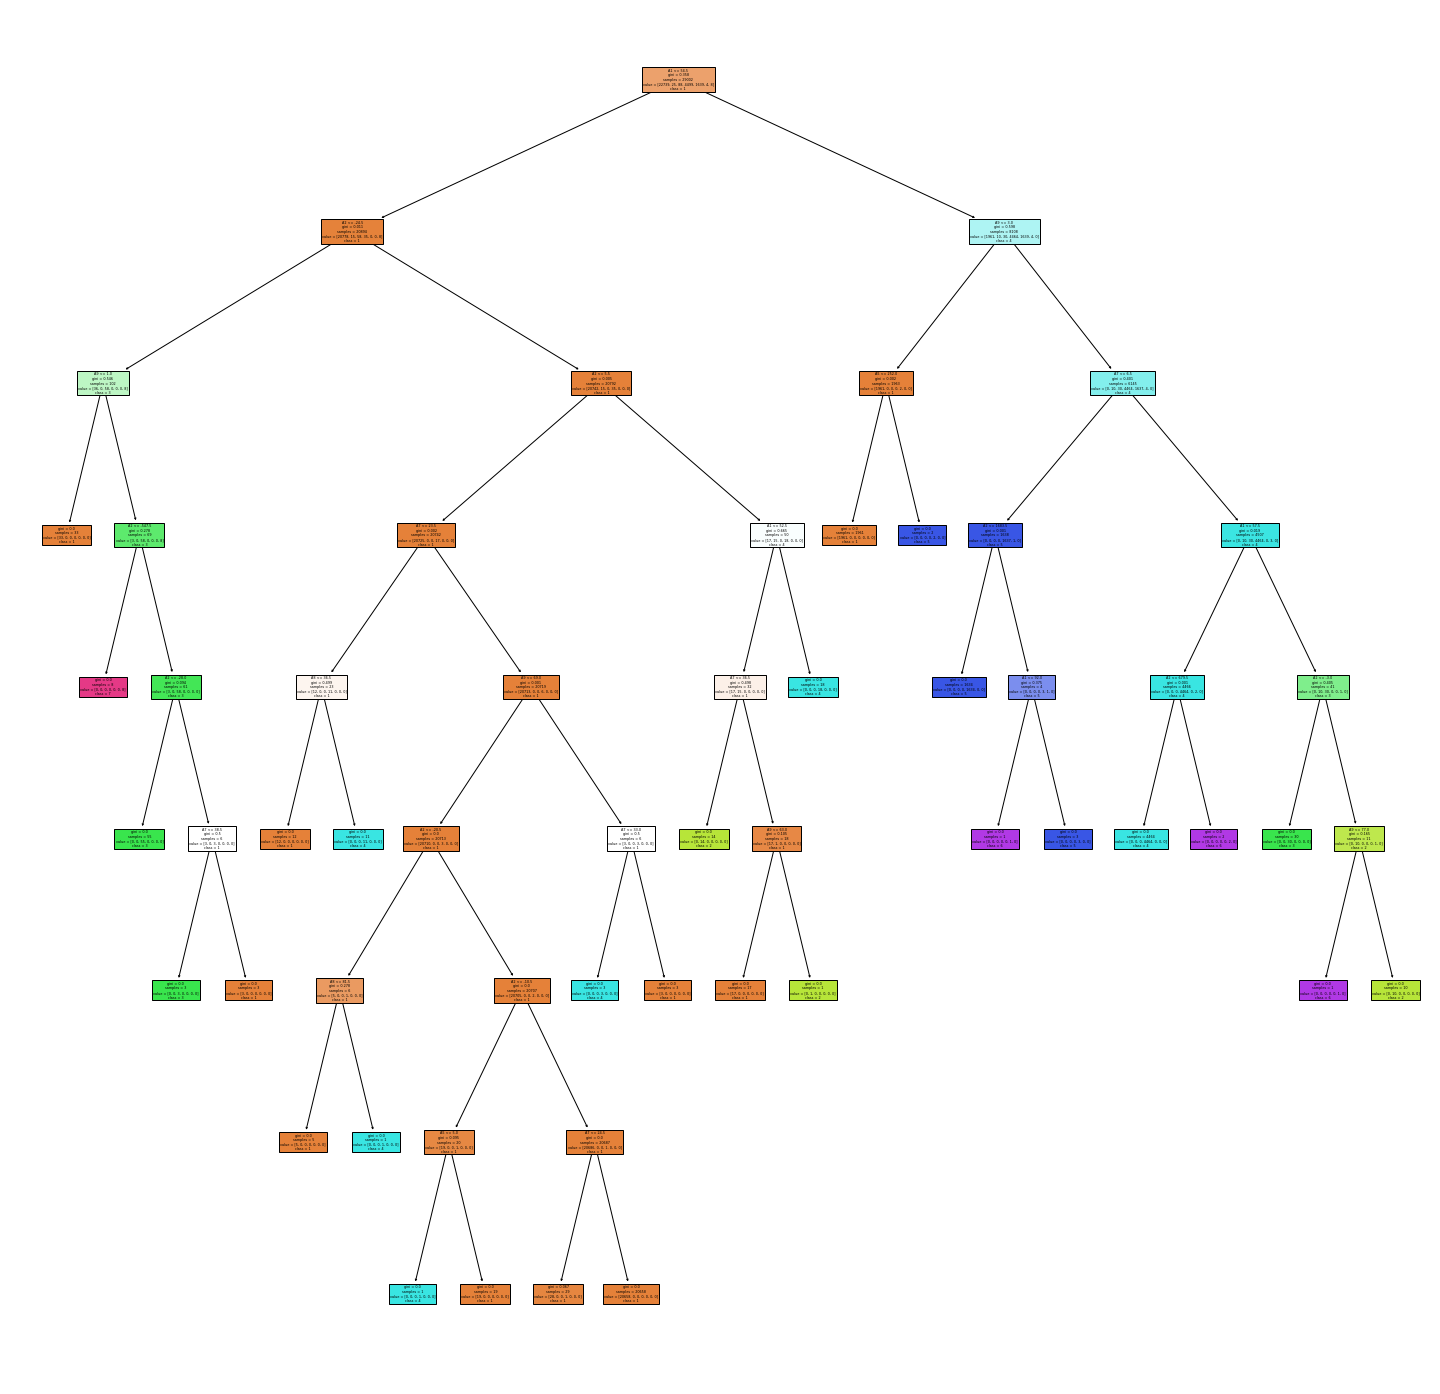

In [44]:
plt.figure(figsize=[25,25])
clf_dt = DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)

y_pred = clf_dt.predict(X_validation)
score = accuracy_score(y_validation,y_pred)

print('Model accuracy : ', score)
# setting performance parameters
print(confusion_matrix(y_validation,y_pred))  
print(classification_report(y_validation,y_pred))  
print(accuracy_score(y_validation, y_pred)) 
plot_tree(clf_dt, filled=True,feature_names=X.columns,class_names=["1","2","3","4","5","6","7"])
plt.show()

- This is a better model than KNN
- In this Model all F Score except for Class 2 and 3 are 1
- For Class 2 recall is 1 - which is good
- We can try to improve on the recall of Class 3

# 4.5 Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(n_estimators=1000,max_depth=12,random_state=5)
# Fit on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(X_validation)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))
print(accuracy_score(y_validation, y_pred))

[[11368     0     1     0     0     0     0]
 [    0    12     0     0     0     0     0]
 [    0     0    44     0     0     0     0]
 [    0     0     0  2249     0     0     0]
 [    0     0     0     0   819     0     0]
 [    0     0     0     1     0     1     0]
 [    0     0     3     0     0     0     0]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11369
           2       1.00      1.00      1.00        12
           3       0.92      1.00      0.96        44
           4       1.00      1.00      1.00      2249
           5       1.00      1.00      1.00       819
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         3

    accuracy                           1.00     14498
   macro avg       0.85      0.79      0.80     14498
weighted avg       1.00      1.00      1.00     14498

0.9996551248448062


C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


No handles with labels found to put in legend.


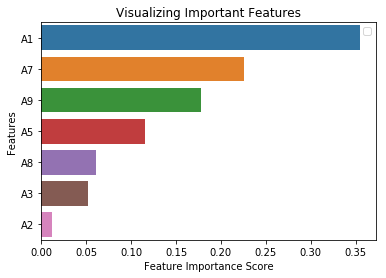

In [53]:
#Check feature importance
feature_imp = pd.Series(rf.feature_importances_,index=X_validation.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

- Random forest is not a good model as it is not able to predict Class 7. F Score of Class 7 is 0.
- The F Score for Class 6 is also low.

# 4.6 XGBM

In [100]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
xg1 = GradientBoostingClassifier(n_estimators=500,max_depth=8,learning_rate=0.1,random_state=4)
# Fit on training data
xg1.fit(X_train, y_train)
# Use the forest's predict method on the test data
y_pred = xg1.predict(X_validation)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))
print(accuracy_score(y_validation, y_pred))

[[11368     0     1     0     0     0     0]
 [    0    12     0     0     0     0     0]
 [    0     0    44     0     0     0     0]
 [    2     0     0  2247     0     0     0]
 [    0     0     1     0   818     0     0]
 [    0     0     0     0     0     2     0]
 [    0     0     0     0     0     0     3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11369
           2       1.00      1.00      1.00        12
           3       0.96      1.00      0.98        44
           4       1.00      1.00      1.00      2249
           5       1.00      1.00      1.00       819
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00     14498
   macro avg       0.99      1.00      1.00     14498
weighted avg       1.00      1.00      1.00     14498

0.999724099875845


No handles with labels found to put in legend.


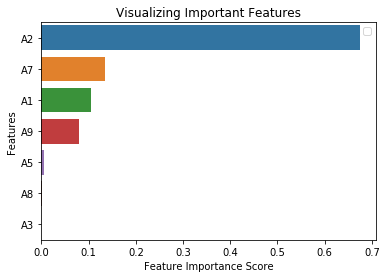

In [102]:
#Check feature importance
feature_imp = pd.Series(xg.feature_importances_,index=X_validation.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

- This is the best model which has F Score for all the class except 3 as 1.00
- For Class 3 also, recall is 1.00 (which is our focus)

# 5. Apply SMOTE (Synthetic Minority Over-sampling Technique)

In [103]:
from imblearn.over_sampling import SMOTE

In [104]:
X=train_data[["A1","A2","A3","A5","A7","A8","A9"]]
y=train_data["Category"]

In [105]:
smote=SMOTE("auto")
X_sm, y_sm= smote.fit_sample(X,y)

In [106]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(random_state=4)
skf.get_n_splits(X_sm,y_sm)
# X is the feature set and y is the target
for train_index, val_index in skf.split(X_sm,y_sm): 
    print("Train:", train_index, "Validation:", val_index) 
    X_train, X_validation = X_sm[train_index], X_sm[val_index] 
    y_train, y_validation = y_sm[train_index], y_sm[val_index]

Train: [ 14463  14464  14466 ... 238753 238754 238755] Validation: [     0      1      2 ... 216015 216016 216017]
Train: [     0      1      2 ... 238753 238754 238755] Validation: [ 14463  14464  14466 ... 227384 227385 227386]
Train: [     0      1      2 ... 227384 227385 227386] Validation: [ 28987  28991  28992 ... 238753 238754 238755]


C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:629: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


# 5.1 XGBM - after applying SMOTE

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [108]:
xg = GradientBoostingClassifier(n_estimators=500,max_depth=8,learning_rate=0.1,random_state=4)
# Fit on training data
xg.fit(X_train, y_train)
# Use the forest's predict method on the test data
y_pred = xg.predict(X_validation)
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))
print(accuracy_score(y_validation, y_pred))

[[11367     0     2     0     0     0     0]
 [    0 11369     0     0     0     0     0]
 [    0     0 11369     0     0     0     0]
 [    0     0     0 11369     0     0     0]
 [    0     0     0     0 11369     0     0]
 [    0     0     0     0     0 11369     0]
 [    0     0     0     0     0     0 11369]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11369
           2       1.00      1.00      1.00     11369
           3       1.00      1.00      1.00     11369
           4       1.00      1.00      1.00     11369
           5       1.00      1.00      1.00     11369
           6       1.00      1.00      1.00     11369
           7       1.00      1.00      1.00     11369

    accuracy                           1.00     79583
   macro avg       1.00      1.00      1.00     79583
weighted avg       1.00      1.00      1.00     79583

0.9999748690046869


- Performance of this model is better than the one without over sampling
- SMOTE has increased the sample size of all the classes.
- F Score of all the classes is 1.00

# 6. Test on Unseen Data

- XGBM(with SMOTE and Stratified k-fold Cross Validation) is the best model
- We will use this model on the unseen data(test.csv)
- Need to remove 2 Variables A4 and A6 from the test.csv

In [137]:
test_data.drop(["A4","A6"],axis=1,inplace=True)

In [138]:
test_data["Category"]=xg.predict(test_data)

In [139]:
test_data.head()

,A1,A2,A3,A5,A7,A8,A9,Category
0,55,0,81,-6,25,88,64,4
1,56,0,96,52,40,44,4,4
2,50,-1,89,50,39,40,2,1
3,53,9,79,42,25,37,12,4
4,55,2,82,54,26,28,2,1


In [140]:
p=test_data.groupby(["Category"]).A1.count().to_frame().rename(columns={'A1':'count_Category'}).reset_index()
p["Category %age"]=p["count_Category"]*100/len(test_data)
p

,Category,count_Category,Category %age
0,1,11476,79.144828
1,2,12,0.082759
2,3,40,0.275862
3,4,2156,14.868966
4,5,810,5.586207
5,6,4,0.027586
6,7,2,0.013793


In [141]:
test_data.to_csv("Submission13.csv")

# Conclusion

- Our objective was to reduce False negatives and False Positives preferably to Zero, because as the data the from a space shuttle so we cannot afford any errors in our prediction
- Random forest model worked best when we reduced the classes in our Target variable to 2
- XGBM worked best in case of MultiClass Classification
- Need to verify the predictions made on the Unseen data
- Shuttle Competition is available on Kaggle - we check the Accuracy score of 0.99977 on test data